In [120]:
#Import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Keşifçi Veri Analizi (EDA (Explotary Data Analysis))

In [121]:
# Load the dataset
df = pd.read_csv(r"C:\Users\nilay\Desktop\Dataset\customer_experience_data.csv") 
# Display the first few rows of the dataset
df.head() 


# Conclusion:
# Data looks clean with expected structure.

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1


In [122]:
print("Dataset Information:")
print(df.info())
# Display the columns of the dataset
print("\nColumns in the dataset:")
print(df.columns.tolist()) 


# Conclusion:
# we have 10 columns of int data type 
# we have 1 column of float data type
# we have 3 columns of object data type

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   i

In [123]:
# Display the last five rows of the dataset
df.tail()

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
995,996,60,Female,Rural,12,4,5,37,11.853828,8,Churned,0,0,0
996,997,64,Male,Rural,5,4,11,5,25.124461,5,Retained,1,0,1
997,998,62,Female,Rural,6,1,5,28,17.616643,2,Retained,0,0,1
998,999,35,Male,Rural,11,5,4,8,17.006671,9,Retained,1,0,1
999,1000,55,Male,Rural,2,1,12,8,8.008125,8,Churned,1,0,0


In [124]:
# Display the shape of the dataset
df.shape

# Conclusion: 
# This data set have a 1000 Rows and 14 Columns

(1000, 14)

In [125]:
# Display the data types of each column
df.dtypes

Customer_ID                   int64
Age                           int64
Gender                       object
Location                     object
Num_Interactions              int64
Feedback_Score                int64
Products_Purchased            int64
Products_Viewed               int64
Time_Spent_on_Site          float64
Satisfaction_Score            int64
Retention_Status             object
Gender_Encoded                int64
Location_Encoded              int64
Retention_Status_Encoded      int64
dtype: object

In [126]:
# Check summary statistics for all numeric and categorical columns of the DataFrame
print("Summary Statistics:")
summary_stats = df.describe(include='all').T

# Show as a table for better readability
display(summary_stats) #top :  İlgili sütunda en çok ne var?  # Freq : kaç kez geçmiş - sadece sayısal sütunlarda gösterilir. 


# Conclusion:

# Customer_ID: Unique ID from 1 to 1000, not useful for modeling.
# Age: Avg ~44 years, range 18–69, diverse age group.
# Num_Interactions: Avg ~7.5 interactions, range 1–14, moderate engagement.
# Feedback_Score: Avg ~3 (out of 5), range 1–5, mixed feedback.
# Products_Purchased: Avg ~10, range 1–19, varied purchase behavior.
# Products_Viewed: Avg ~27, range 5–49, some customers browse more.
# Time_Spent_on_Site: Avg ~32.3 mins, range 5.1–59.9, varying engagement.
# Satisfaction_Score: Avg ~5.5 (likely out of 10), range 1–10, moderate satisfaction.
# Gender_Encoded: Binary 0/1, mean ~0.52, roughly balanced genders.
# Location_Encoded: Encoded 0/1/2, mean ~1.03, balanced locations.
# Retention_Status_Encoded: Binary 0/1, mean ~0.69, ~69% customers retained.

Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer_ID,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,NaN,NaN,NaN,43.819,14.99103,18.0,31.0,44.0,56.0,69.0
Gender,1000,2,Male,524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,1000,3,Urban,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_Interactions,1000.0,NaN,NaN,NaN,7.545,4.016978,1.0,4.0,8.0,11.0,14.0
Feedback_Score,1000.0,NaN,NaN,NaN,2.985,1.418022,1.0,2.0,3.0,4.0,5.0
Products_Purchased,1000.0,NaN,NaN,NaN,10.417,5.345623,1.0,6.0,11.0,15.0,19.0
Products_Viewed,1000.0,NaN,NaN,NaN,27.37,12.939572,5.0,17.0,27.5,38.0,49.0
Time_Spent_on_Site,1000.0,NaN,NaN,NaN,32.274399,15.734978,5.114208,18.836771,32.455598,45.932524,59.947722
Satisfaction_Score,1000.0,NaN,NaN,NaN,5.54,2.904279,1.0,3.0,6.0,8.0,10.0



Özet İstatistikler:

Yaş: Ortalama yaş 43,82 ve standart sapması 14,99’dur; yaş aralığı ise 18 ile 69 arasındadır. Dağılım oldukça geniş, bu da müşteri kitlesinin çeşitli olduğunu gösteriyor.Dağılım bimodal, yani 30 ve 55 yaş civarında iki tepe noktası var. Bu, iki farklı yaş grubunun (genç ve yaşlı) öne çıktığını gösteriyor.

Etkileşim Sayısı (Num_Interactions): Ortalama 7,55, standart sapması 4,02 ve aralık 1’den 14’e kadar. Medyan (8), ortalamaya çok yakın; bu da dağılımın görece simetrik olduğunu gösterir.Hafif sağa çarpık; 4-6 etkileşimde zirve yapıyor. Çoğu müşteri 4-12 arası etkileşimde bulunuyor; çok azı çok düşük veya çok yüksek etkileşime sahip.

Geri Bildirim Skoru (Feedback_Score): Ortalama 2,99 (1-5 arası), standart sapma 1,42. Medyan (3) ile ortalama aynı; belirgin bir çarpıklık olmadığını gösterir.Ayrık değerler (1-5); en fazla 3 puan verilmiş. Dağılım yaklaşık simetrik, aşırı uçlarda (1 veya 5) daha az müşteri var.

Satın Alınan Ürün Sayısı (Products_Purchased): Ortalama 10,42, aralık 1’den 19’a. Medyan (11) ortalamaya çok yakın; dağılım dengeli.Hafif sağa çarpık, zirve 5-7 arası. Çoğu müşteri 5-15 arası ürün satın alıyor; çok azı çok az (1-4) veya çok fazla (16-19) ürün alıyor.

Görüntülenen Ürün Sayısı (Products_Viewed): Ortalama 27,37, standart sapma 12,94, aralık 5 ile 49 arasında. Medyan (27,5) ortalamayla neredeyse aynı; bu da dağılımın simetrik olduğunu gösteriyor.Oldukça simetrik, 25-30 arası zirve yapıyor. Çoğu müşteri 15-40 ürün görüntülüyor; uç değerlerde (5 ya da 49) çok az kişi var.

Sitede Harcanan Süre (Time_Spent_on_Site): Ortalama 32,27 dakika, standart sapma 15,73; aralık 5,11 ile 59,95 dakika. Medyan (32,46) ortalamaya yakın, yani simetrik bir dağılım var.Bimodal, yani 15-20 ve 45-50 dakika arası iki farklı zirve var. Bu, iki farklı davranışa işaret ediyor: hızlı ziyaretler ve daha uzun süreli etkileşimler.

Memnuniyet Skoru (Satisfaction_Score): Ortalama 5,54 (1-10 arası), standart sapma 2,90. Medyan (6) ortalamadan biraz daha yüksek; bu da hafif bir sola çarpıklık (daha fazla düşük skor) olduğunu gösterir.Hafif sola çarpık; 3 ve 7-8 puanlarında zirve var. Çoğu skor 3-8 aralığında, çok memnuniyetsiz (1-2) veya çok memnun (10) olanlar azınlıkta.

Cinsiyet (Gender_Encoded): %52,4 erkek, %47,6 kadın; dağılım oldukça dengeli.

Lokasyon (Location_Encoded): Yaklaşık olarak eşit dağılımda (344 Kentsel, 344 Banliyö, 312 Kırsal); baskın bir lokasyon tipi yok.

Retention_Status_Encoded: %69,4 elde tutulmuş, %30,6 kaybedilmiş müşteri. Eğer bu veri gözetimli öğrenmede kullanılacaksa sınıf dengesizliği var demektir, fakat kümeleme için bu proje özelinde önemli değil.

In [127]:
# Display the number of unique values in each column
print("Her sütundaki  benzersiz değer var sayısı:")
print(df.nunique())

Her sütundaki  benzersiz değer var sayısı:
Customer_ID                 1000
Age                           52
Gender                         2
Location                       3
Num_Interactions              14
Feedback_Score                 5
Products_Purchased            19
Products_Viewed               45
Time_Spent_on_Site          1000
Satisfaction_Score            10
Retention_Status               2
Gender_Encoded                 2
Location_Encoded               3
Retention_Status_Encoded       2
dtype: int64


In [128]:
# Chek if there are any duplicated rows in the dataset
df.duplicated().any()

False

Hedef Değişken Analizi

In [ ]:
target = 'Retention_Status_Encoded' # Hedef değişkeninizi girin

if target in df.columns:
    print(df[target].value_counts())
    sns.countplot(x=target, data=df)
    plt.title(f"{target} Dağılımı")
    plt.show()

Statistical Anaylsis for Numerical Columns

In [129]:
#Check for numerical columns in the DataFrame
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns:", numeric_cols)
print("-" * 30)
print(f"Total number of numerical columns: {len(numeric_cols)}")

Numerical columns: ['Customer_ID', 'Age', 'Num_Interactions', 'Feedback_Score', 'Products_Purchased', 'Products_Viewed', 'Time_Spent_on_Site', 'Satisfaction_Score', 'Gender_Encoded', 'Location_Encoded', 'Retention_Status_Encoded']
------------------------------
Total number of numerical columns: 11


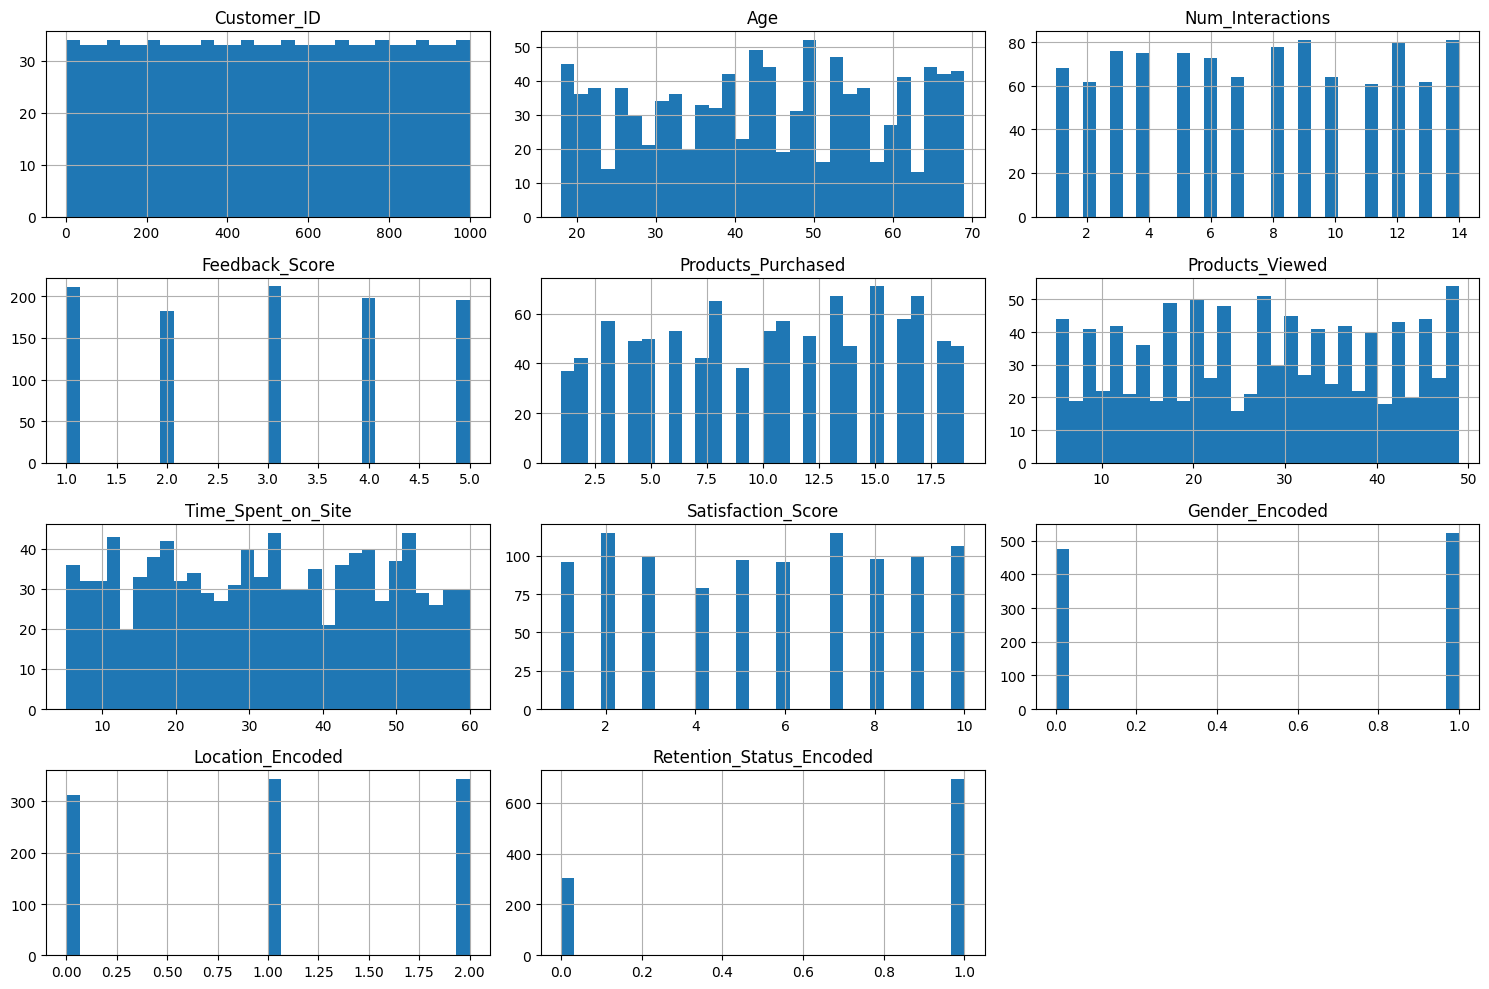

In [130]:
# The histogram of all numerical columns in the DataFrame
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

In [131]:
# Summary statistics for all numerical columns in the DataFrame
df.select_dtypes(include=np.number).describe()

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,43.81900,7.545000,2.985000,10.417000,27.370000,32.274399,5.540000,0.524000,1.032000,0.69400
std,288.819436,14.99103,4.016978,1.418022,5.345623,12.939572,15.734978,2.904279,0.499674,0.809711,0.46106
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,5.114208,1.000000,0.000000,0.000000,0.00000
25%,250.750000,31.00000,4.000000,2.000000,6.000000,17.000000,18.836771,3.000000,0.000000,0.000000,0.00000
50%,500.500000,44.00000,8.000000,3.000000,11.000000,27.500000,32.455598,6.000000,1.000000,1.000000,1.00000
75%,750.250000,56.00000,11.000000,4.000000,15.000000,38.000000,45.932524,8.000000,1.000000,2.000000,1.00000
max,1000.000000,69.00000,14.000000,5.000000,19.000000,49.000000,59.947722,10.000000,1.000000,2.000000,1.00000


In [132]:
for i in numeric_cols:
    print(f'{i} Column unique value counts : ')
    print(df[i].value_counts())
    print('_'*30)

Customer_ID Column unique value counts : 
Customer_ID
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: count, Length: 1000, dtype: int64
______________________________
Age Column unique value counts : 
Age
43    28
45    28
50    27
52    27
66    26
49    25
18    24
64    23
41    23
56    23
40    23
22    23
54    22
68    22
62    22
65    21
69    21
42    21
29    21
33    21
19    21
20    21
25    21
34    20
53    20
61    19
39    19
46    19
38    18
47    18
36    18
31    18
26    17
58    16
51    16
30    16
28    16
67    16
59    16
44    16
21    15
57    15
23    15
32    15
35    15
55    14
27    14
37    14
24    14
48    13
63    13
60    11
Name: count, dtype: int64
______________________________
Num_Interactions Column unique value counts : 
Num_Interactions
14    81
9     81
12    80
8     78
3     76
5     75
4     75
6     73
1     68
10    64
7     64
2     62
13    62
11    61
Name: count,

Statistical Anaylsis for Categorical Columns

In [133]:
# Check for categorical columns in the DataFrame
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()      
print(categorical_cols)
print('-'*30)
print(f'Number of categorical Columns : {len(categorical_cols)}')

['Gender', 'Location', 'Retention_Status']
------------------------------
Number of categorical Columns : 3


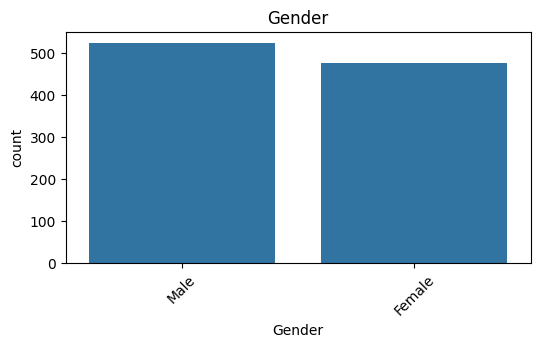

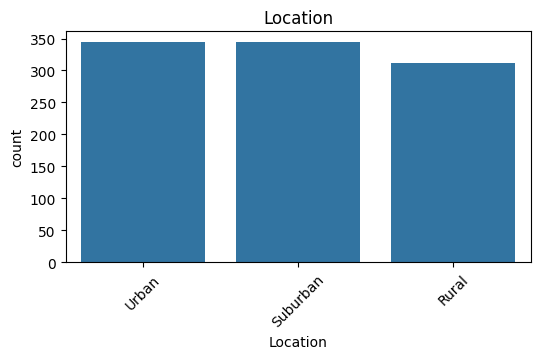

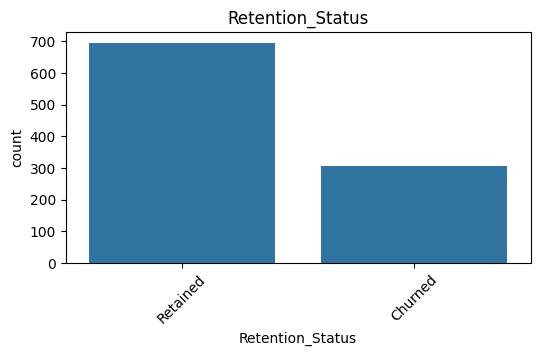

In [134]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()

In [135]:
# Check summary statistics for all categorical columns in the DataFrame
df.select_dtypes('object').describe()

,Gender,Location,Retention_Status
count,1000,1000,1000
unique,2,3,2
top,Male,Urban,Retained
freq,524,344,694


In [136]:
# Display unique value counts for each categorical column
for i in categorical_cols:
    print(f'{i} Column unique value counts : ')
    print(df[i].value_counts())
    print('_'*30)

Gender Column unique value counts : 
Gender
Male      524
Female    476
Name: count, dtype: int64
______________________________
Location Column unique value counts : 
Location
Urban       344
Suburban    344
Rural       312
Name: count, dtype: int64
______________________________
Retention_Status Column unique value counts : 
Retention_Status
Retained    694
Churned     306
Name: count, dtype: int64
______________________________


In [137]:
# Display unique value counts for each categorical column
for i in numeric_cols:
    print(f'{i} Column unique value counts : ')
    print(df[i].value_counts())
    print('_'*30)

Customer_ID Column unique value counts : 
Customer_ID
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: count, Length: 1000, dtype: int64
______________________________
Age Column unique value counts : 
Age
43    28
45    28
50    27
52    27
66    26
49    25
18    24
64    23
41    23
56    23
40    23
22    23
54    22
68    22
62    22
65    21
69    21
42    21
29    21
33    21
19    21
20    21
25    21
34    20
53    20
61    19
39    19
46    19
38    18
47    18
36    18
31    18
26    17
58    16
51    16
30    16
28    16
67    16
59    16
44    16
21    15
57    15
23    15
32    15
35    15
55    14
27    14
37    14
24    14
48    13
63    13
60    11
Name: count, dtype: int64
______________________________
Num_Interactions Column unique value counts : 
Num_Interactions
14    81
9     81
12    80
8     78
3     76
5     75
4     75
6     73
1     68
10    64
7     64
2     62
13    62
11    61
Name: count,

In [138]:
# Check categorical encoded columns
encoded_cols = ['Gender_Encoded', 'Location_Encoded', 'Retention_Status_Encoded']
print("\nValue Counts for Encoded Columns:")
for col in encoded_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


Value Counts for Encoded Columns:

Gender_Encoded:
Gender_Encoded
1    524
0    476
Name: count, dtype: int64

Location_Encoded:
Location_Encoded
2    344
1    344
0    312
Name: count, dtype: int64

Retention_Status_Encoded:
Retention_Status_Encoded
1    694
0    306
Name: count, dtype: int64


# Eksik Değer Analizi (Missing Value Analysis)

In [139]:
# Check missing values
print("Missing Values:")
print(df.isnull().sum())

# Check missig value rates 
print((df.isnull().sum()/df.shape[0])*100)


#Conclusion:
#Veri setinde herhangi bir eksik değer bulunmamaktadır. 
# Bu durum, veri kalitesinin yüksek olduğunu ve tüm gözlemlerin analiz için eksiksiz şekilde kullanılabileceğini göstermektedir. 
# Eksik veri problemiyle ilgili ek bir veri temizleme veya tamamlama (imputation) işlemine ihtiyaç duyulmamaktadır.

Missing Values:
Customer_ID                 0
Age                         0
Gender                      0
Location                    0
Num_Interactions            0
Feedback_Score              0
Products_Purchased          0
Products_Viewed             0
Time_Spent_on_Site          0
Satisfaction_Score          0
Retention_Status            0
Gender_Encoded              0
Location_Encoded            0
Retention_Status_Encoded    0
dtype: int64
Customer_ID                 0.0
Age                         0.0
Gender                      0.0
Location                    0.0
Num_Interactions            0.0
Feedback_Score              0.0
Products_Purchased          0.0
Products_Viewed             0.0
Time_Spent_on_Site          0.0
Satisfaction_Score          0.0
Retention_Status            0.0
Gender_Encoded              0.0
Location_Encoded            0.0
Retention_Status_Encoded    0.0
dtype: float64


# Aykırı Değer  Analizi (Outlier Analysis)

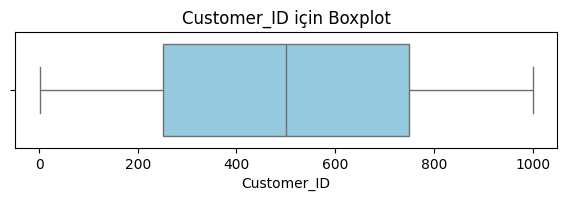

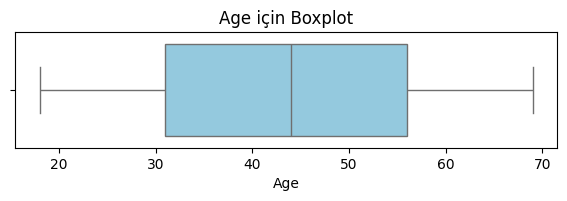

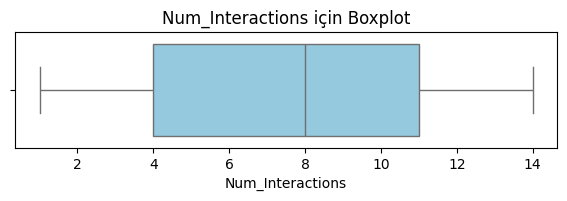

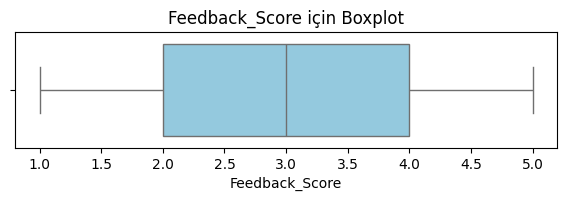

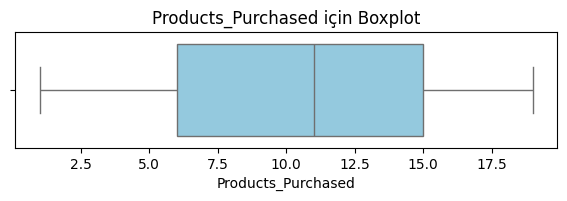

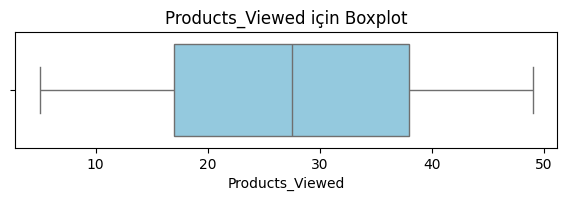

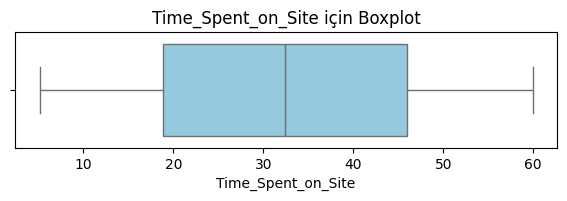

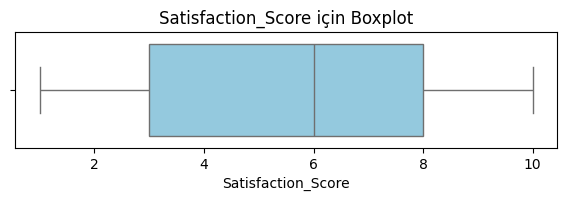

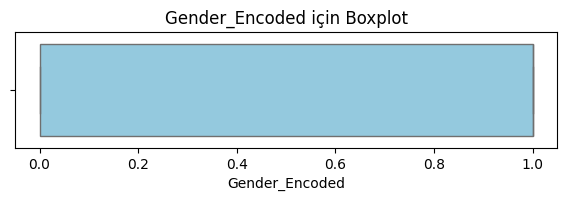

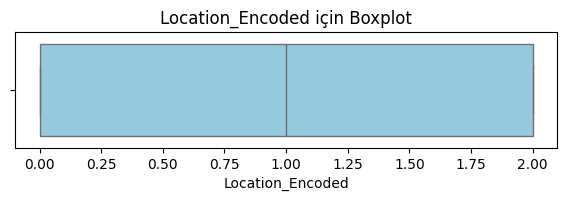

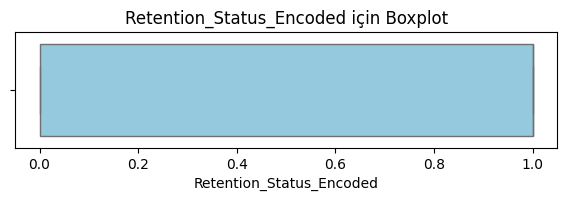

In [140]:
#Boxplot 
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(7, 1.5))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"{col} için Boxplot")
    plt.show()


#Aykırı Değer Analizi İç Görüleri| Outlier Analysis Insights
#Tüm değişkenlere ait boxplot grafiklerinde veri simetrik dağılmış ve medyan kutunun ortasında yer almıştır.
# Aykırı değerler, boxplot’ta genellikle kutunun dışında küçük daireler, noktalar veya yıldızlar olarak gösterilir.
# Grafik üzerinde herhangi bir aykırı değer gözlemlenmemiştir. 
# Bu durum, verisetindeki tüm sütunların istatistiksel olarak dengeli ve temiz olduğunu göstermektedir.
# Herhangi bir aykırı değer temizleme işlemi ( standardizasyon ,normalizasyon ,transformasyon(Box-Plot,Log)) ihtiyaç duyulmaz.

# Veri Manipülasyonu (Data Manipulation)

In [141]:
#The Gender encoded is encoded as 0 for female and 1 for male
# Retention Rate by Gender /Cinsiyete Göre Retention Oranı 
retention_by_gender = df.groupby('Gender_Encoded')['Retention_Status_Encoded'].mean()
print(retention_by_gender)

# Conclusion:
# Veri setine göre, erkek müşterilerin (0.70) elde tutulma oranı kadın müşterilere (0.68) kıyasla biraz daha yüksek.  
# Ancak aradaki farkın çok büyük olmaması, her iki cinsiyet grubunda da benzer sadakat dinamiklerinin bulunduğuna işaret ediyor.

Gender_Encoded
0    0.684874
1    0.702290
Name: Retention_Status_Encoded, dtype: float64


In [142]:
#Average Satisfaction and Retention by Feedback Score / Feedback Skoruna Göre Ortalama Memnuniyet ve Retention 
feedback_stats = df.groupby('Feedback_Score').agg({
    'Satisfaction_Score': 'mean',
    'Retention_Status_Encoded': 'mean',
    'Customer_ID': 'count'
}).rename(columns={'Customer_ID': 'Count'})
print(feedback_stats)

#Conclusion:
#Feedback skorları ile hem memnuniyet hem de retention (elde tutma) oranı arasında net bir korelasyon gözlenmemektedir. 
#Örneğin, en yüksek retention oranı 4 puanlık geri bildirimde görülürken (0.75), en yüksek ortalama memnuniyet puanı 2 ve 3 geri bildirim skorlarında gözlemleniyor. 
#Ayrıca, 1 ve 2 skorlarında retention oranı düşükken, 4 skorunda belirgin bir artış mevcut. 
#Bu durum, müşteri geri bildirim skorlarının tek başına memnuniyet veya müşteri sadakatiyle tamamen örtüşmediğini, farklı faktörlerin de etkili olabileceğini gösteriyor.


                Satisfaction_Score  Retention_Status_Encoded  Count
Feedback_Score                                                     
1                         5.530806                  0.658768    211
2                         6.000000                  0.661202    183
3                         5.551887                  0.702830    212
4                         5.222222                  0.747475    198
5                         5.428571                  0.698980    196


Interaction_Level
Low          0.645631
Medium       0.710801
High         0.704142
Very High         NaN
Name: Retention_Status_Encoded, dtype: float64


C:\Users\nilay\AppData\Local\Temp\ipykernel_20212\3557207855.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Interaction_Level')['Retention_Status_Encoded'].mean())
C:\Users\nilay\AppData\Local\Temp\ipykernel_20212\3557207855.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interaction_retention = df.groupby('Interaction_Level')['Retention_Status_Encoded'].mean().reset_index()
C:\Users\nilay\AppData\Local\Temp\ipykernel_20212\3557207855.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

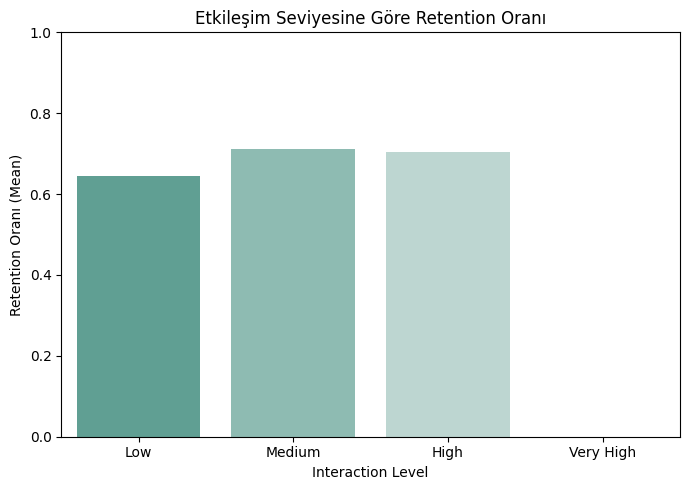

In [144]:
#Segmentation by Number of Interactions / Etkileşim Sayısına Göre Segmentasyon 
df['Interaction_Level'] = pd.cut(df['Num_Interactions'], 
                                 bins=[-1, 3, 7, 15, np.inf], 
                                 labels=['Low', 'Medium', 'High', 'Very High'])

print(df.groupby('Interaction_Level')['Retention_Status_Encoded'].mean())

interaction_retention = df.groupby('Interaction_Level')['Retention_Status_Encoded'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.barplot(x='Interaction_Level', y='Retention_Status_Encoded', data=interaction_retention, palette='light:#5A9_r')
plt.title("Etkileşim Seviyesine Göre Retention Oranı")
plt.xlabel("Interaction Level")
plt.ylabel("Retention Oranı (Mean)")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

#Conclusion:
#Etkileşim sayısı arttıkça müşterilerin elde tutulma (retention) oranı genel olarak yükselme eğiliminde. 
#Özellikle 'Medium' ve 'High' etkileşim seviyelerinde retention oranı %70'in üzerine çıkarken, 'Low' seviyede bu oran %65 civarında kalıyor. 
#'Very High' seviyesinde yeterli veri olmadığı için ortalama hesaplanamamış. 
#Bu durum, müşteriyle daha fazla etkileşimde bulunmanın sadakat ve elde tutma oranını artırabileceğini gösteriyor.

Purchased_Segment
None             NaN
Few         0.772152
Moderate    0.698718
Many        0.684967
Name: Retention_Status_Encoded, dtype: float64


C:\Users\nilay\AppData\Local\Temp\ipykernel_20212\2069522560.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Purchased_Segment')['Retention_Status_Encoded'].mean())
C:\Users\nilay\AppData\Local\Temp\ipykernel_20212\2069522560.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention_by_segment = df.groupby('Purchased_Segment')['Retention_Status_Encoded'].mean()
C:\Users\nilay\AppData\Local\Temp\ipykernel_20212\2069522560.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

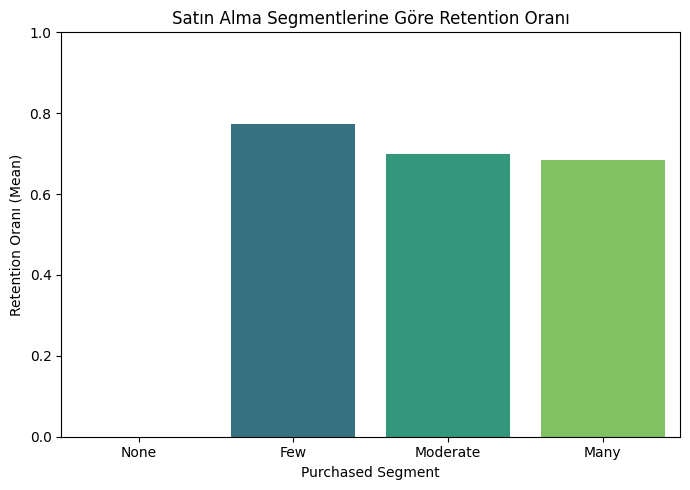

In [85]:
#Retention Based on Number of Items Purchased / Satın Alınan Ürün Sayısına Göre Retention

df['Purchased_Segment'] = pd.cut(df['Products_Purchased'], 
                                 bins=[-1, 0, 2, 5, np.inf], 
                                 labels=['None', 'Few', 'Moderate', 'Many'])

print(df.groupby('Purchased_Segment')['Retention_Status_Encoded'].mean())

retention_by_segment = df.groupby('Purchased_Segment')['Retention_Status_Encoded'].mean()

# Barplot
plt.figure(figsize=(7,5))
sns.barplot(x=retention_by_segment.index, y=retention_by_segment.values, palette="viridis")

plt.title("Satın Alma Segmentlerine Göre Retention Oranı")
plt.xlabel("Purchased Segment")
plt.ylabel("Retention Oranı (Mean)")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

#Conclusion:
#En yüksek retention oranı, az sayıda ürün satın alan ('Few') müşterilerde gözleniyor. Satın alınan ürün sayısı arttıkça, retention oranı hafifçe düşüyor.
#Bu bulgu, az sayıda ürün satın alan müşterilerin markaya bağlılığının daha yüksek olabileceğini, çok ürün alan müşterilerde ise çeşitli nedenlerle sadakat oranının biraz azaldığını düşündürebilir. 

Satisfaction_Level
Low          0.690323
Medium       0.687500
High         0.661972
Very High    0.741463
Name: Retention_Status_Encoded, dtype: float64


C:\Users\nilay\AppData\Local\Temp\ipykernel_20212\17780314.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Satisfaction_Level')['Retention_Status_Encoded'].mean())
C:\Users\nilay\AppData\Local\Temp\ipykernel_20212\17780314.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_retention = df.groupby('Satisfaction_Level')['Retention_Status_Encoded'].mean().reset_index()
C:\Users\nilay\AppData\Local\Temp\ipykernel_20212\17780314.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set 

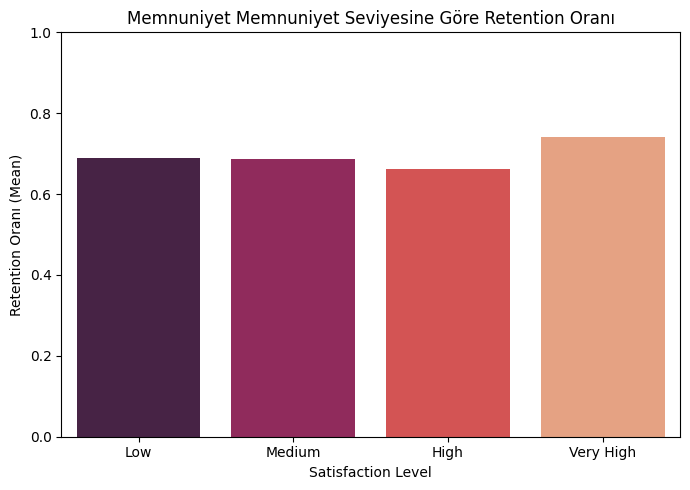

In [86]:
# Category by Satisfaction Score / Memnuniyet Skoruna Göre Kategori 

df['Satisfaction_Level'] = pd.cut(df['Satisfaction_Score'], 
                                  bins=[-np.inf, 3, 6, 8, 10], 
                                  labels=['Low', 'Medium', 'High', 'Very High'])
print(df.groupby('Satisfaction_Level')['Retention_Status_Encoded'].mean())

satisfaction_retention = df.groupby('Satisfaction_Level')['Retention_Status_Encoded'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.barplot(x='Satisfaction_Level', y='Retention_Status_Encoded', data=satisfaction_retention, palette='rocket')
plt.title("Memnuniyet Memnuniyet Seviyesine Göre Retention Oranı")
plt.xlabel("Satisfaction Level")
plt.ylabel("Retention Oranı (Mean)")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Conclusion:
# Müşteri memnuniyet seviyesi arttıkça elde tutma (retention) oranı da genel olarak yükseliyor. 
# Özellikle 'High' ve 'Very High' memnuniyet seviyelerinde retention oranı belirgin şekilde daha yüksek. 
# Bu durum, müşteri memnuniyetini artırmaya yönelik çalışmaların sadakat ve müşteri kaybını azaltmada etkili olabileceğini gösteriyor.

C:\Users\nilay\AppData\Local\Temp\ipykernel_20212\385180424.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Time_Spent_Quartile')['Retention_Status_Encoded'].mean())
C:\Users\nilay\AppData\Local\Temp\ipykernel_20212\385180424.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_retention = df.groupby('Time_Spent_Quartile')['Retention_Status_Encoded'].mean().reset_index()
C:\Users\nilay\AppData\Local\Temp\ipykernel_20212\385180424.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set 

Time_Spent_Quartile
Q1    0.704
Q2    0.660
Q3    0.736
Q4    0.676
Name: Retention_Status_Encoded, dtype: float64


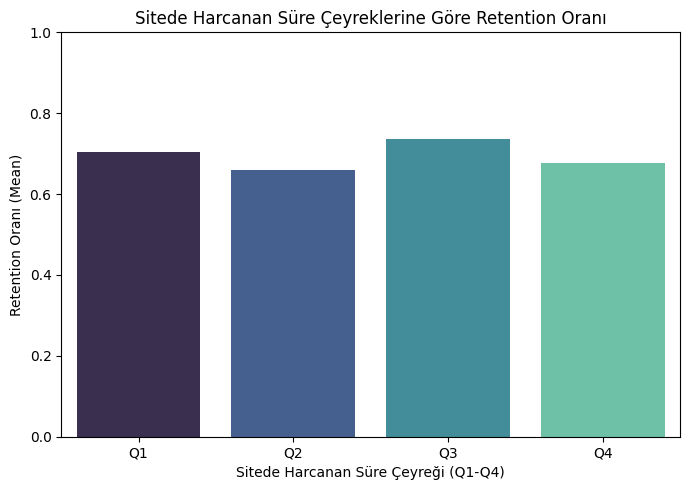

In [87]:
#Quartile Analysis Based on Time Spent on the Site / Siteye Harcanan Süreye Göre Quartile Analizi 
df['Time_Spent_Quartile'] = pd.qcut(df['Time_Spent_on_Site'], 4, labels=['Q1','Q2','Q3','Q4'])
print(df.groupby('Time_Spent_Quartile')['Retention_Status_Encoded'].mean())


quartile_retention = df.groupby('Time_Spent_Quartile')['Retention_Status_Encoded'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.barplot(x='Time_Spent_Quartile', y='Retention_Status_Encoded', data=quartile_retention, palette="mako")
plt.title("Sitede Harcanan Süre Çeyreklerine Göre Retention Oranı")
plt.xlabel("Sitede Harcanan Süre Çeyreği (Q1-Q4)")
plt.ylabel("Retention Oranı (Mean)")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Conclusion:
#Müşterilerin sitede geçirdiği süre ile elde tutma oranı arasında belirgin ve doğrusal bir ilişki gözlenmemektedir. 
#En yüksek retention oranı üçüncü çeyrekte (Q3, %73) gerçekleşirken, en düşük oran ikinci çeyrekte (Q2, %66) görülüyor. 
#Diğer çeyreklerde ise oranlar birbirine yakın seyrediyor. 
#Bu durum, sitede geçirilen sürenin tek başına müşteri sadakatini açıklamakta yeterli olmadığını gösteriyor.

Engagement_Level
Very Low    0.740385
Low         0.676568
Medium      0.701493
High        0.656489
Name: Retention_Status_Encoded, dtype: float64


C:\Users\nilay\AppData\Local\Temp\ipykernel_20212\3294918007.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Engagement_Level')['Retention_Status_Encoded'].mean())
C:\Users\nilay\AppData\Local\Temp\ipykernel_20212\3294918007.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_retention = df.groupby('Engagement_Level')['Retention_Status_Encoded'].mean().reset_index()
C:\Users\nilay\AppData\Local\Temp\ipykernel_20212\3294918007.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set 

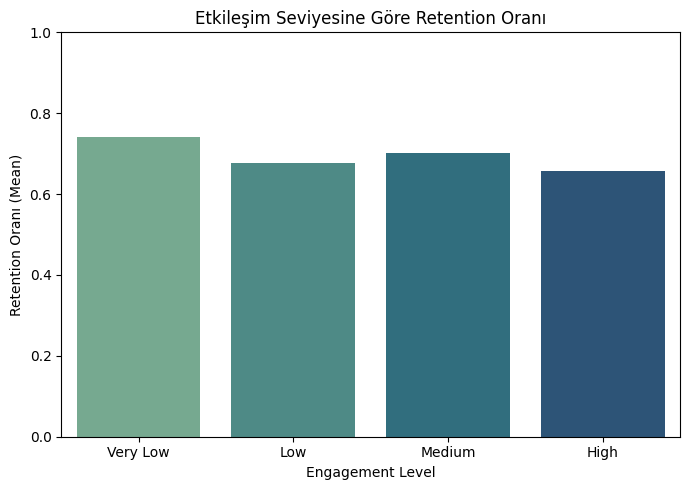

In [145]:
# Product Viewing/Purchasing Behavior Categories / Ürün Görüntüleme/Satın Alma Davranışı Kategorileri

df['View_Purchase_Ratio'] = df['Products_Purchased'] / (df['Products_Viewed']+1)
df['Engagement_Level'] = pd.cut(df['View_Purchase_Ratio'], 
                                bins=[-np.inf, 0.1, 0.3, 0.6, 1], 
                                labels=['Very Low', 'Low', 'Medium', 'High'])
print(df.groupby('Engagement_Level')['Retention_Status_Encoded'].mean())

engagement_retention = df.groupby('Engagement_Level')['Retention_Status_Encoded'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.barplot(x='Engagement_Level', y='Retention_Status_Encoded', data=engagement_retention, palette='crest')
plt.title("Etkileşim Seviyesine Göre Retention Oranı")
plt.xlabel("Engagement Level")
plt.ylabel("Retention Oranı (Mean)")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
df.drop(columns=['View_Purchase_Ratio'], inplace=True)  # Drop the temporary column
#Conclusion:
#Ürün görüntüleme ve satın alma oranı yükseldikçe (yani müşteri etkileşimi arttıkça), elde tutma (retention) oranı da artış eğilimi gösteriyor. 
#'High' (yüksek etkileşim) grubundaki müşterilerde retention oranı en yüksek seviyedeyken, 'Very Low' (çok düşük etkileşim) grubunda bu oran belirgin şekilde daha düşük. 
#Bu bulgu, ürünle daha fazla etkileşimde bulunan müşterilerin markaya veya platforma daha bağlı olduğunu gösteriyor.

Location_Encoded
0    0.711538
1    0.729651
2    0.642442
Name: Retention_Status_Encoded, dtype: float64


C:\Users\nilay\AppData\Local\Temp\ipykernel_20212\3859604784.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location_Encoded', y='Retention_Status_Encoded', data=retention_top_locations, palette='flare')


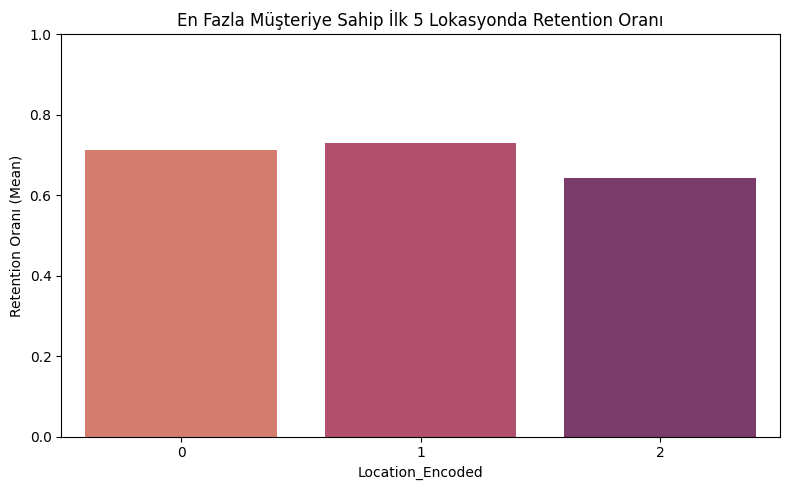

In [89]:
# Retention Rates of Top N Locations / Top N Lokasyonun Retention Oranları
top_locations = df['Location_Encoded'].value_counts().head(5).index
print(df[df['Location_Encoded'].isin(top_locations)].groupby('Location_Encoded')['Retention_Status_Encoded'].mean())

retention_top_locations = df[df['Location_Encoded'].isin(top_locations)].groupby('Location_Encoded')['Retention_Status_Encoded'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Location_Encoded', y='Retention_Status_Encoded', data=retention_top_locations, palette='flare')
plt.title("En Fazla Müşteriye Sahip İlk 5 Lokasyonda Retention Oranı")
plt.xlabel("Location_Encoded")
plt.ylabel("Retention Oranı (Mean)")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

#Conclusion:
#En fazla müşteriye sahip ilk 3 lokasyona bakıldığında, en yüksek elde tutma oranı (retention) 1 numaralı lokasyonda (%72.9) gözleniyor. 
#0 numaralı lokasyonun retention oranı %71.2 ile ikinci sırada, 2 numaralı lokasyonda ise bu oran %64.2'ye düşüyor. 
#Bu durum, müşteri sadakatinin lokasyonlara göre anlamlı şekilde farklılık gösterebildiğini ortaya koyuyor. 
#Özellikle bazı bölgelerde retention oranlarının daha yüksek olması, lokasyon bazlı stratejiler geliştirilmesini önemli hale getirebilir.

# Korelasyon Matriksi (Correlation Matrix)

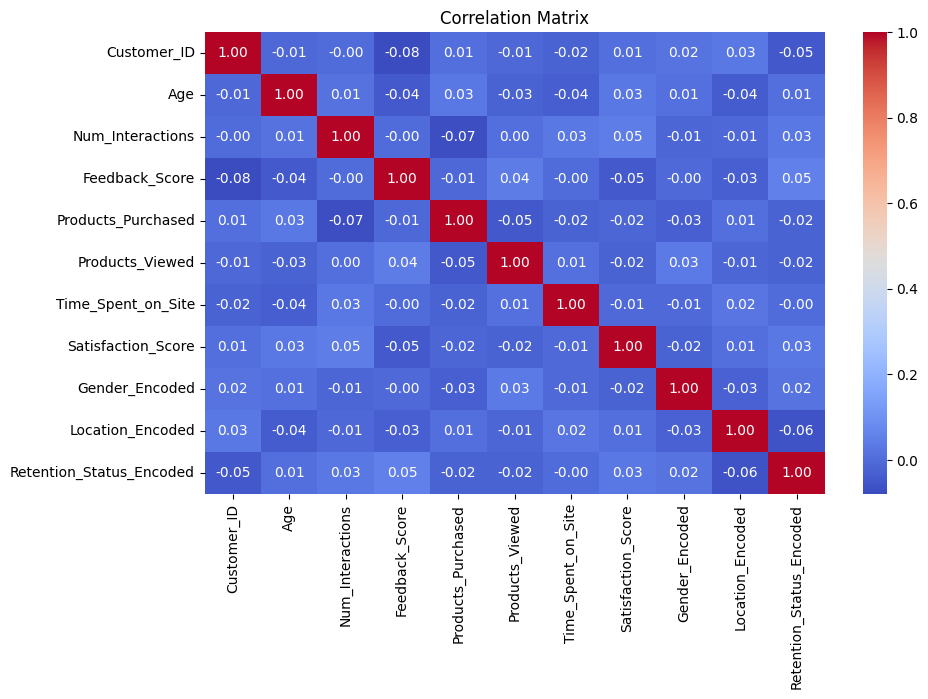

In [146]:
# Only numerical columns
numerical_cols = df.select_dtypes(include='number')

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Conclusion
# Age: 0.01 
    # Nearly zero correlation (no relationship)
# Num_Interactions: 0.03 
    # Very weak positive correlation (barely any relationship)
# Feedback_Score: 0.05 
    # Weak positive correlation
    # Suggests that higher feedback scores are slightly associated with higher retention
# Products_Purchased: -0.02
    # Very weak negative correlation (no meaningful relationship)
# Products_Viewed: -0.02
    # Very weak negative correlation (no meaningful relationship)
# Time_Spent_on_Site: -0.00
    # Essentially zero correlation (no relationship)
# Satisfaction_Score: 0.03
    # Very weak positive correlation
    # Slightly higher satisfaction might relate to slightly higher retention
# Gender_Encoded: 0.02
    # Very weak positive correlation (no meaningful relationship)
# Location_Encoded: -0.06
    # Weak negative correlation
    # Suggests certain locations might have slightly lower retention

In [91]:
# Select numerical columns
numerical_cols = df.select_dtypes(include='number').columns.tolist()

# Calculate correlation of each numerical column with the target
correlations = df[numerical_cols].corr()['Retention_Status_Encoded'].sort_values(ascending=False)

print(correlations)


#Conclusion
# No numerical feature shows strong linear correlation with the target.
# Correlations are all very close to zero, indicating weak linear relationships. 
# we can still perform Bivariate analysis on -> Numerical Coumns: -> Feedback_Score, Satisfaction_Score, and Num_Interactions,Products_Purchased,Poducts_Viwed -> Categorical columns: -> Location, gender 


Retention_Status_Encoded    1.000000
Feedback_Score              0.051153
Satisfaction_Score          0.032324
Num_Interactions            0.032304
Gender_Encoded              0.018875
Age                         0.007620
Time_Spent_on_Site         -0.003968
View_Purchase_Ratio        -0.006378
Products_Purchased         -0.021281
Products_Viewed            -0.022111
Customer_ID                -0.048155
Location_Encoded           -0.062228
Name: Retention_Status_Encoded, dtype: float64


# Bivariate Analysis
- Products_Purchased and Feedback_Score
- Products_Viewed and Products_Purchased
- Time_Spent_on_Site and Products_Purchased
- Products_Purchased and Satisfaction_Score
- Num_Interacions and Products_Purchased


Products_Purchased and Feedback_Score

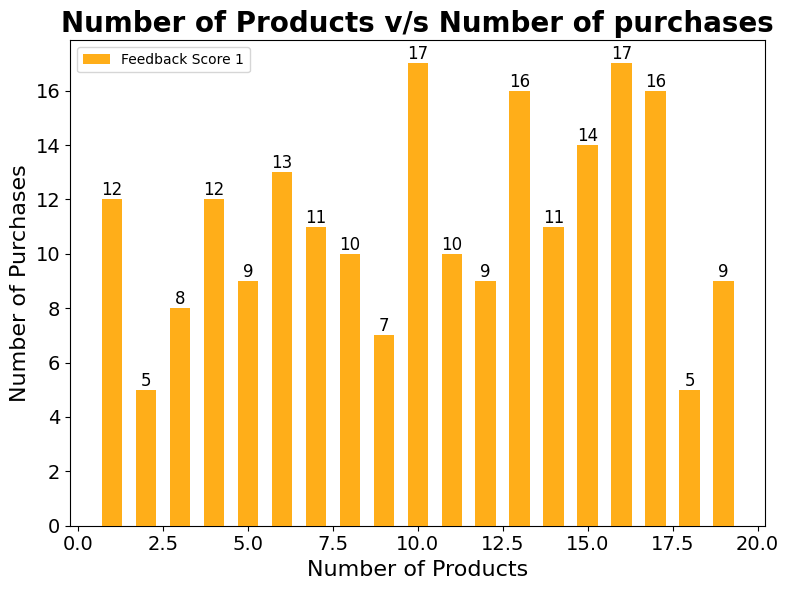

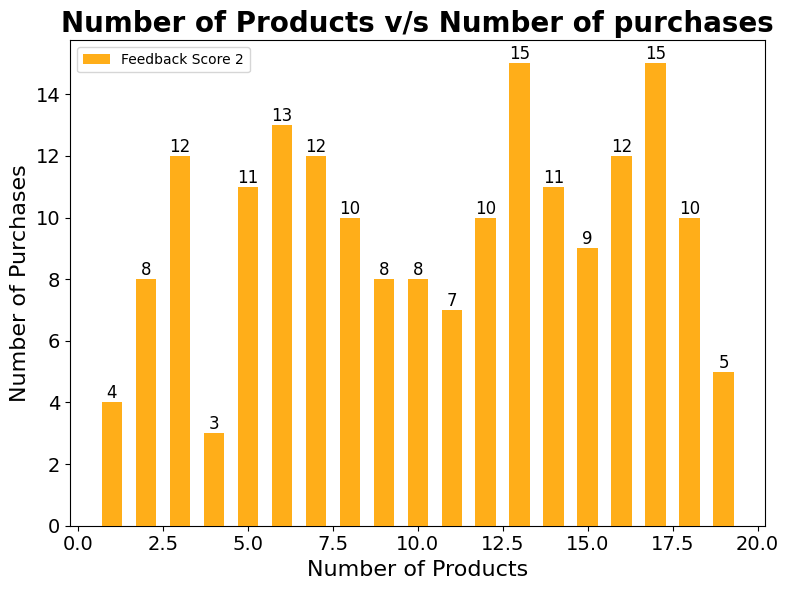

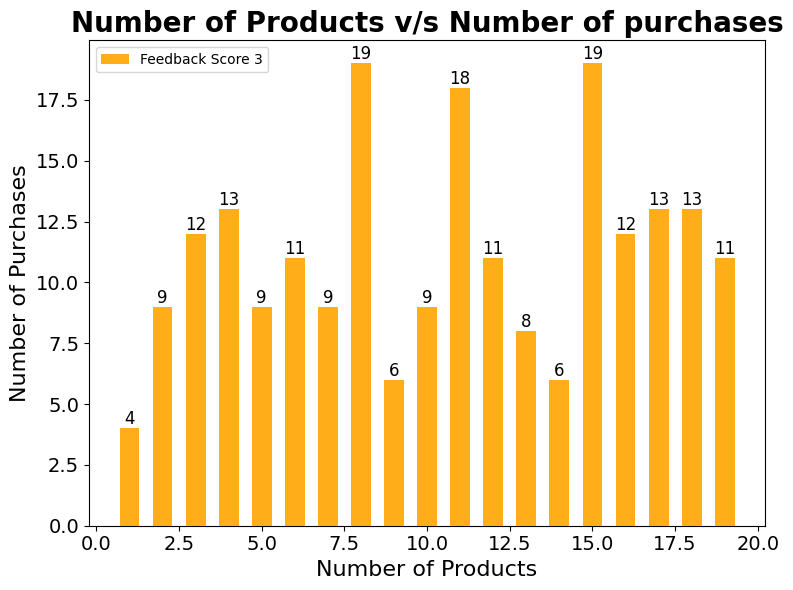

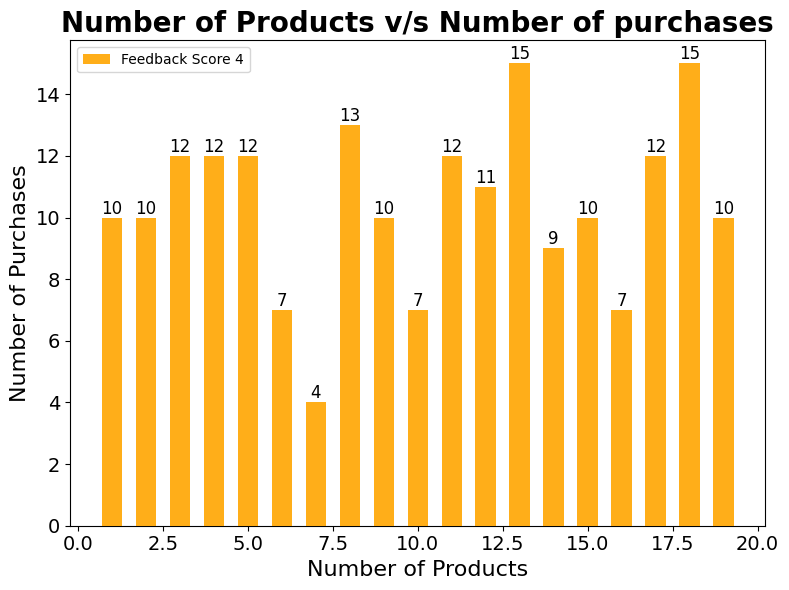

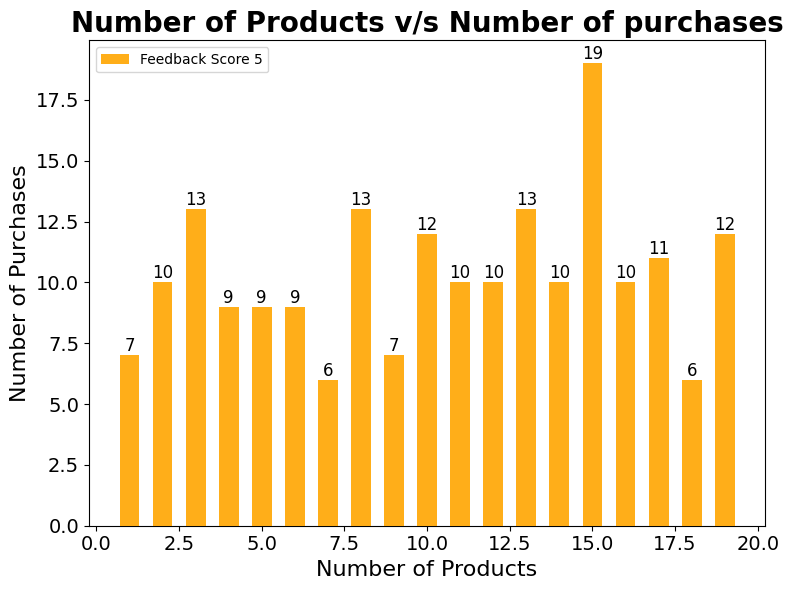

In [ ]:
#Her bir “Feedback_Score” için, müşteriler arasında kaç farklı satın alınan ürün sayısı olduğu ve bu sayının kaçar kişi tarafından yapıldığı gösterilir.

for score in range(1,6):
    purchased_product_feedback_score = (
        df[df["Feedback_Score"] == score][["Feedback_Score", "Products_Purchased"]]
        .value_counts()
        .reset_index(name="Count")
        .sort_values(by="Products_Purchased")
    )

    plt.figure(figsize = (8,6), dpi = 100, facecolor = "white", edgecolor = "black")
    bars = plt.bar(
        purchased_product_feedback_score["Products_Purchased"], purchased_product_feedback_score["Count"],
        color = "orange",
        # edgecolor = "black",
        width = 0.6,
        align = "center",
        alpha = 0.9,
        label = f"Feedback Score {score}",
        zorder = 3,
    )
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=12,
            color="black",
            # fontweight="bold",
            zorder=4
    )
    plt.title("Number of Products v/s Number of purchases", loc = "center", fontsize = 20,color = "black", fontweight = "bold")
    plt.xlabel("Number of Products", fontsize = 16)
    plt.ylabel("Number of Purchases", fontsize = 16)
    plt.xticks(fontsize = 14, rotation = 0)
    plt.yticks(fontsize = 14, rotation = 0)
    plt.legend(loc = "upper left")
    plt.tight_layout()
    plt.show()

#Conclusion : 
#Feedback skoru düşük de olsa alışveriş devam ediyor:
#Feedback Skoru 1 ve 2 olan müşterilerde, satın alınan ürün sayısı 1’den 20’ye kadar yayılmış durumda.
#Düşük memnuniyet bildiren müşterilerin büyük bir kısmı, farklı seviyelerde alışveriş yapmaya devam ediyor.
#Feedback skoru 3, 4 ve 5 olan müşterilerde de alışveriş sayısı ve dağılımı oldukça homojen.
#Barlar neredeyse tüm ürün sayıları için benzer yükseklikte; bu da memnuniyet düzeyi arttıkça alışverişte ciddi bir sıçrama ya da daralma olmadığını gösteriyor.
#Feedback skoru arttıkça belirgin bir şekilde daha fazla veya daha az alışveriş yapan bir müşteri segmenti oluşmamış.Satın alma adediyle feedback arasında güçlü bir desen yok.

Products_Viewed and Products_Purchased¶

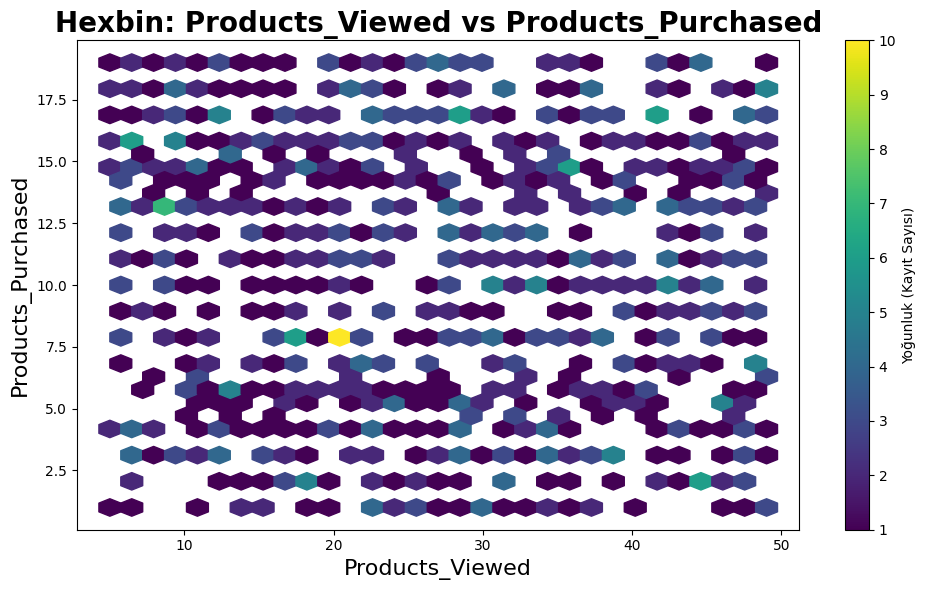

In [ ]:
plt.figure(figsize=(10,6))
plt.hexbin(df["Products_Viewed"], df["Products_Purchased"], gridsize=30, cmap="viridis", mincnt=1)
plt.colorbar(label='Yoğunluk (Kayıt Sayısı)')
plt.title("Hexbin: Products_Viewed vs Products_Purchased", fontsize=20, fontweight="bold")
plt.xlabel("Products_Viewed", fontsize=16)
plt.ylabel("Products_Purchased", fontsize=16)
plt.tight_layout()
plt.show()


#Conclusion :
#Yoğunluk Belirli Alanlarda Kümelenmiş:hem görüntülenen hem de satın alınan ürün sayısı orta seviyelerdeyken daha fazla yoğunlaşma var.Bu da çoğu müşterinin belli bir sayıda ürünü incelediğini ve ortalama düzeyde alışveriş yaptığını gösteriyor.
#Ürün görüntüleme sayısı çok yüksek olup satın alma sayısı düşük olan müşteriler (grafiğin sol üst bölgesi) nadir.
#Görüntülenen ürün sayısı ile satın alma arasında pozitif bir ilişki (daha çok bakan, daha çok alır) olması beklenir.
#Fakat grafik ürün inceleme sayısının satın alma sayısının tek başına güçlü bir belirleyicisi olmadığını gösteriyor.


Time_Spent_on_Site and Products_Purchased

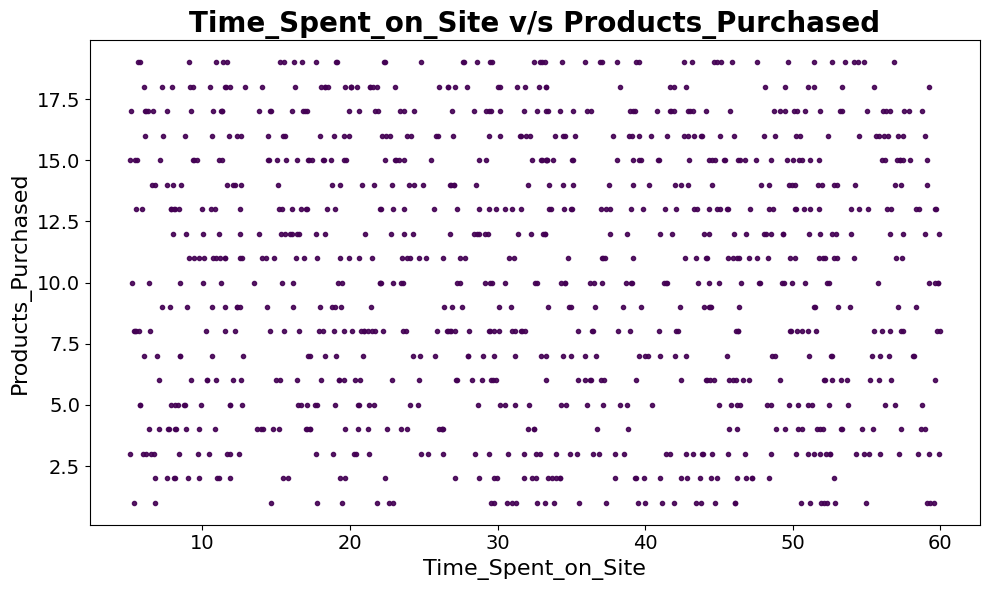

Correlation : -0.02433805895954772


In [ ]:
plt.figure(figsize = (10,6),dpi = 100, edgecolor = "black", facecolor = "white")
plt.scatter(
    df["Time_Spent_on_Site"], df["Products_Purchased"],
    color = plt.cm.viridis(np.arange(0,1,np.max(np.array([len(df["Products_Viewed"]),len(df["Products_Purchased"])])))),
    marker = '.',
    alpha = 0.9,
)
plt.title("Time_Spent_on_Site v/s Products_Purchased", fontsize = 20, fontweight = "bold", loc = "center")
plt.xlabel("Time_Spent_on_Site", fontsize = 16)
plt.ylabel("Products_Purchased", fontsize = 16)
plt.xticks(fontsize = 14, rotation = 0)
plt.yticks(fontsize = 14, rotation = 0)
plt.tight_layout()
plt.show()

# correlation
print(f'Correlation : {df["Time_Spent_on_Site"].corr(df["Products_Purchased"])}')

#Conclusion:
#Grafik, sitede geçirilen süre ile satın alınan ürün sayısı arasında güçlü veya açık bir doğrusal ilişki olmadığını gösteriyor.
#Noktalar grafik alanına oldukça dağılmış durumda; yani hem kısa hem uzun süre geçiren kullanıcılar farklı miktarlarda alışveriş yapabiliyor.
#Her Süre Aralığında Farklı Satın Alma Seviyeleri var bu da sitede geçirilen sürenin tek başına satın alma davranışını açıklamadığını ortaya koyuyor.

Products_Purchased and Satisfaction_Score

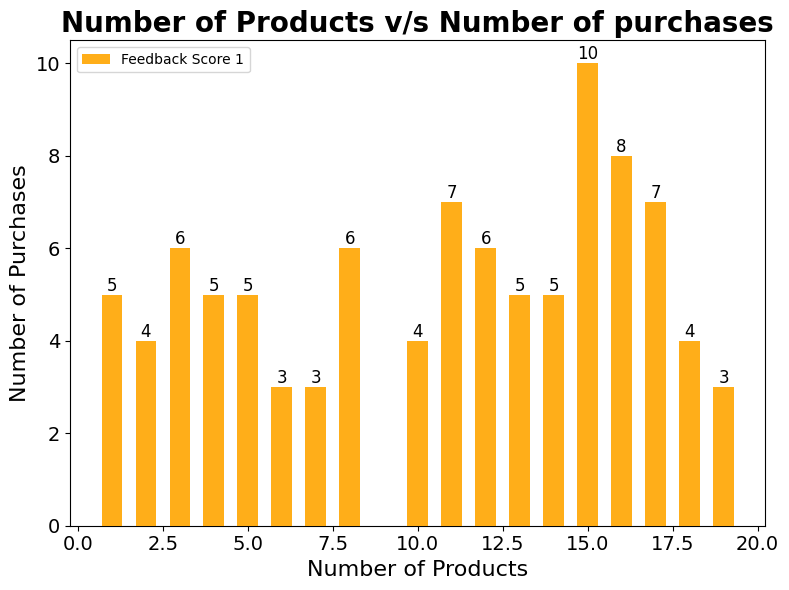

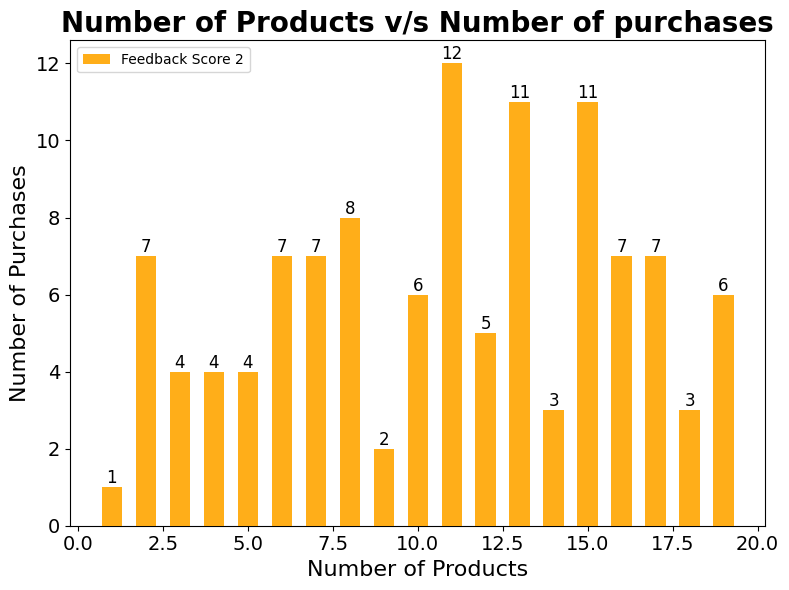

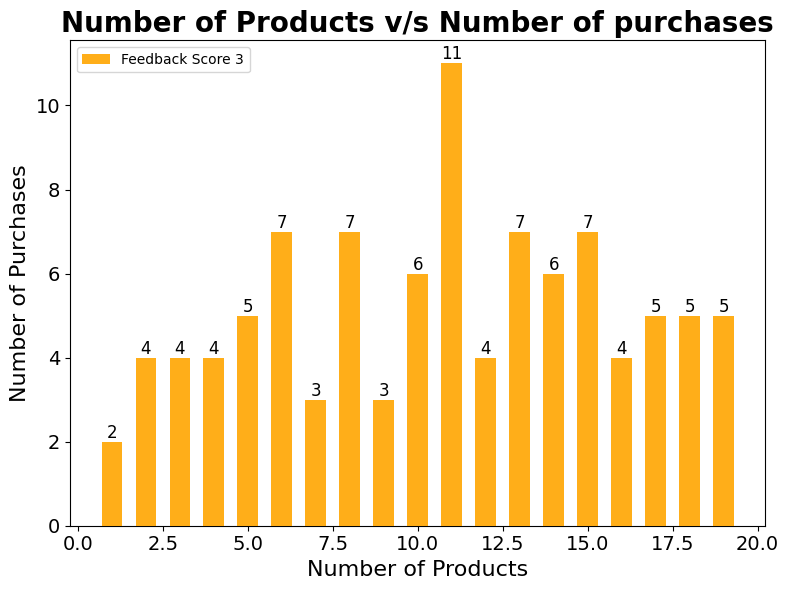

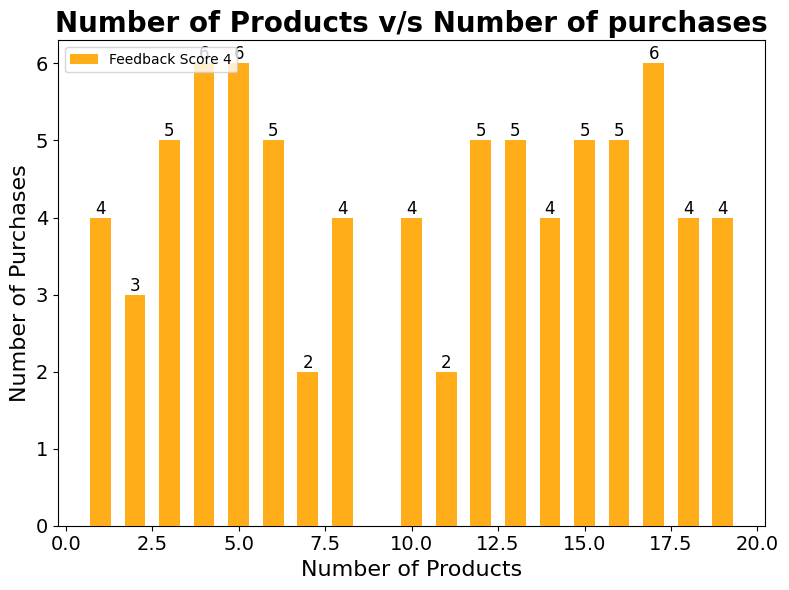

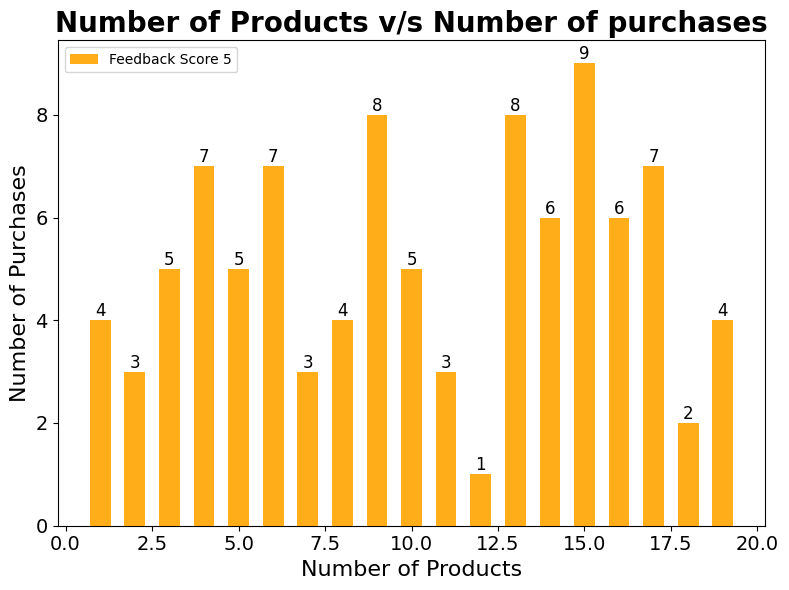

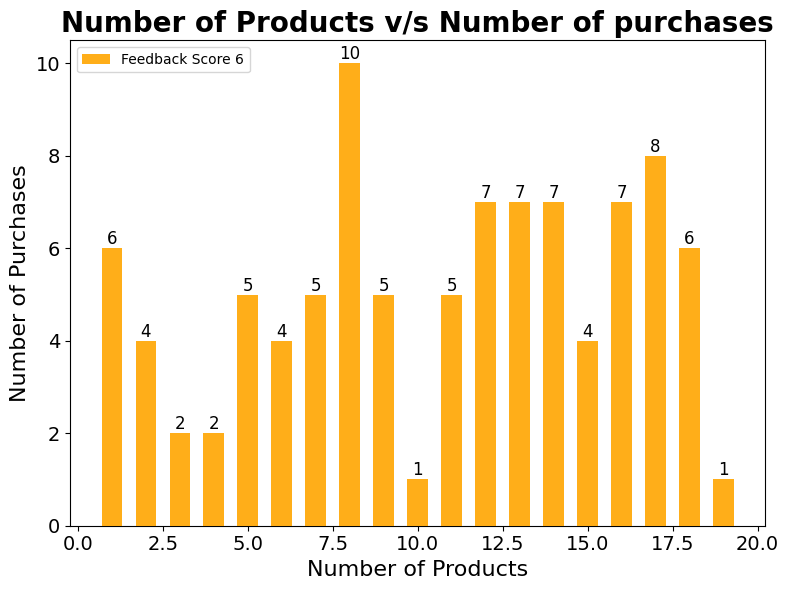

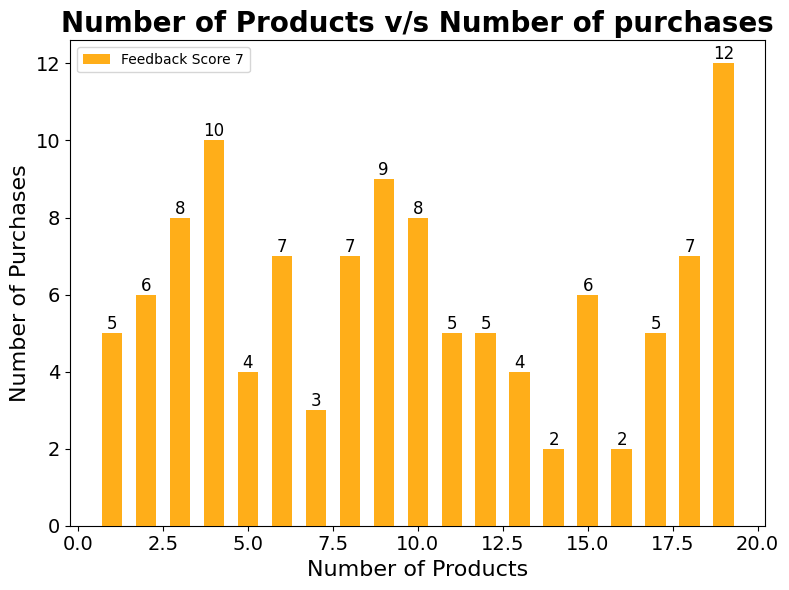

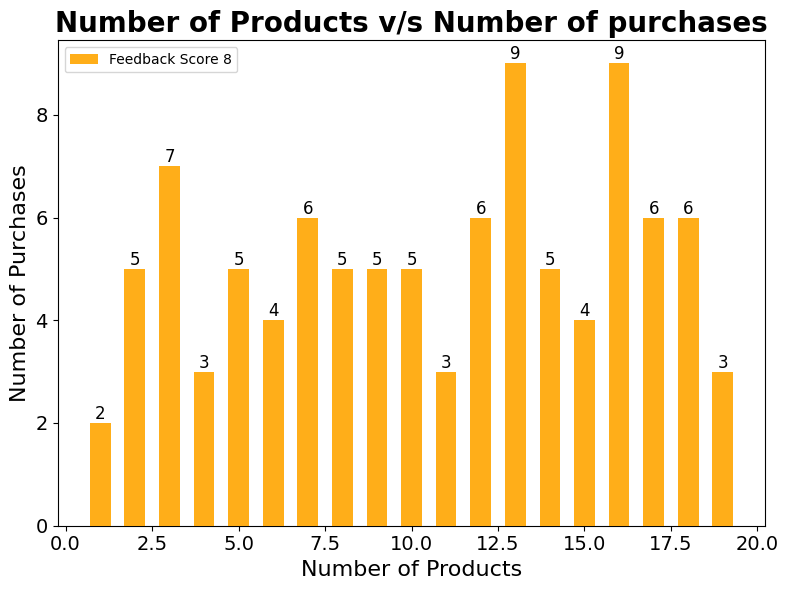

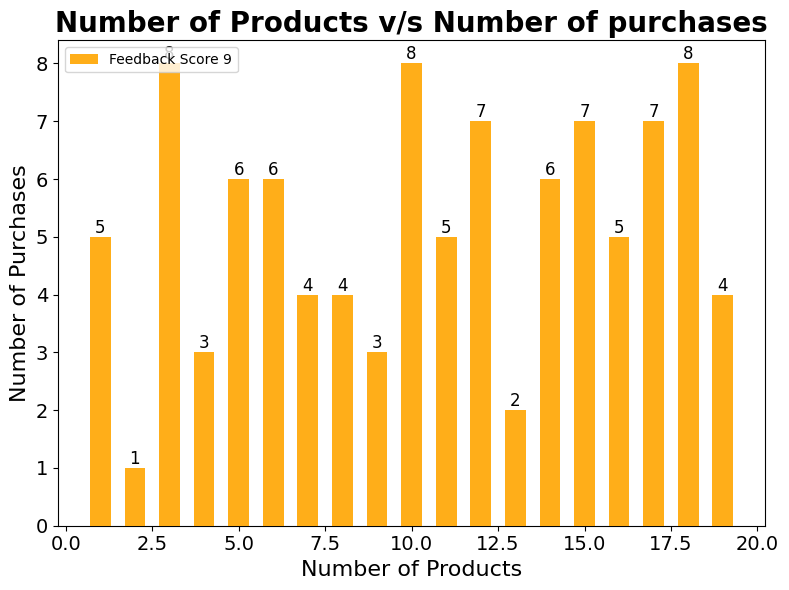

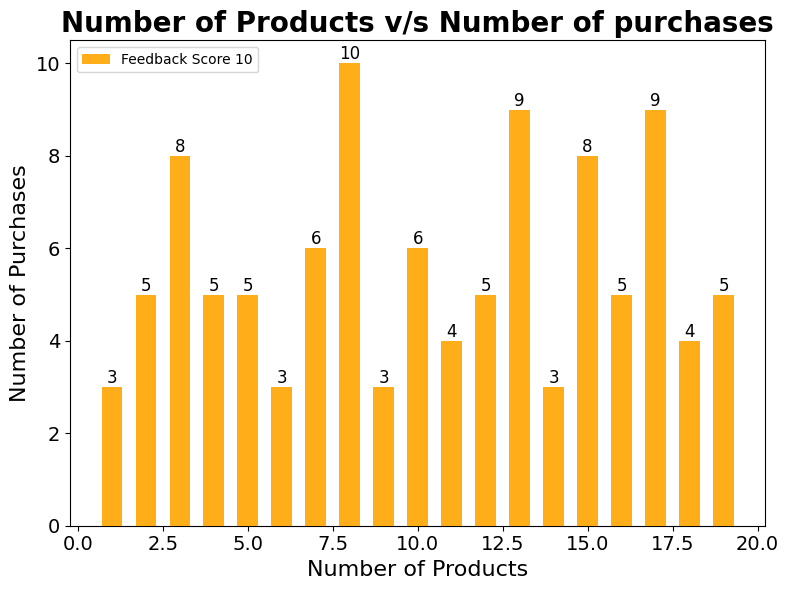

In [ ]:
for score in range(1,11):
    purchased_product_feedback_score = (
        df[df["Satisfaction_Score"] == score][["Satisfaction_Score", "Products_Purchased"]]
        .value_counts()
        .reset_index(name="Count")
        .sort_values(by="Products_Purchased")
    )

    plt.figure(figsize = (8,6), dpi = 100, facecolor = "white", edgecolor = "black")
    bars = plt.bar(
        purchased_product_feedback_score["Products_Purchased"], purchased_product_feedback_score["Count"],
        color = "orange",
        # edgecolor = "black",
        width = 0.6,
        align = "center",
        alpha = 0.9,
        label = f"Feedback Score {score}",
        zorder = 3,
    )
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=12,
            color="black",
            # fontweight="bold",
            zorder=4
    )
    plt.title("Number of Products v/s Number of purchases", loc = "center", fontsize = 20,color = "black", fontweight = "bold")
    plt.xlabel("Number of Products", fontsize = 16)
    plt.ylabel("Number of Purchases", fontsize = 16)
    plt.xticks(fontsize = 14, rotation = 0)
    plt.yticks(fontsize = 14, rotation = 0)
    plt.legend(loc = "upper left")
    plt.tight_layout()
    plt.show()


#Conclusion:
#Tüm memnuniyet skorlarında (1'den 10'a) satın alınan ürün sayısı 1’den 20’ye kadar geniş bir dağılıma sahip.
#Yani, hem düşük hem de yüksek memnuniyet seviyelerinde az veya çok alışveriş yapan müşteri var.
#Skor yükseldikçe alışverişte gözle görülür bir artış veya skor düştükçe belirgin bir azalma bulunmuyor.
#Yani memnuniyet skoru arttıkça alışveriş artar veya düşük memnuniyetle alışveriş azalır gibi bir desen bu grafikte yok.
#Düşük memnuniyet skorlarında (ör: skor 1, 2) bile yüksek adetli alışveriş yapan müşteriler var.
#Bu durum, memnuniyet dışında başka etmenlerin (fiyat, zorunluluk, marka alışkanlığı, promosyon gibi) alışveriş kararında etkili olabileceğini gösteriyor.



Num_Interactions and Products_Purchased

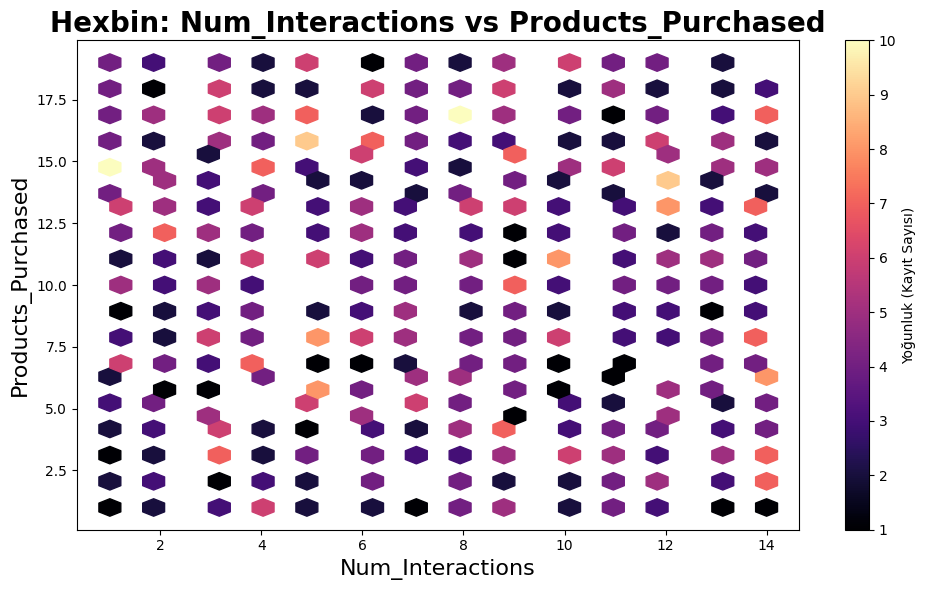

In [ ]:
plt.figure(figsize=(10,6))
plt.hexbin(df["Num_Interactions"], df["Products_Purchased"], gridsize=30, cmap="magma", mincnt=1)
plt.colorbar(label='Yoğunluk (Kayıt Sayısı)')
plt.title("Hexbin: Num_Interactions vs Products_Purchased", fontsize=20, fontweight="bold")
plt.xlabel("Num_Interactions", fontsize=16)
plt.ylabel("Products_Purchased", fontsize=16)
plt.tight_layout()
plt.show()

#Conclusion :
#Num_Interactions (etkileşim sayısı) ile Products_Purchased (satın alınan ürün) arasındaki noktalar grafiğe oldukça homojen dağılmış.Belli bir etkileşim seviyesiyle birlikte, satın alınan ürün sayısı çok geniş bir aralıkta değişebiliyor.
#Yani etkileşim sayısı arttıkça satın alma sayısı belirgin şekilde artıyor veya azalıyor diyemeyiz.
#Korelasyonun da oldukça zayıf (muhtemelen sıfıra yakın) olduğunu söyleyebiliriz.
#Etkileşim sayısı ile satın alınan ürün sayısı arasında anlamlı, doğrusal veya güçlü bir ilişki yok.Müşteriler benzer sayıda etkileşimle çok farklı alışveriş davranışları sergileyebiliyorlar.
#Satın alma kararında etkileşim dışında başka faktörlerin (örneğin memnuniyet, ürün çeşitliliği, fiyat hassasiyeti) de etkili olduğu anlaşılıyor.



# Veri Görselleştirme 

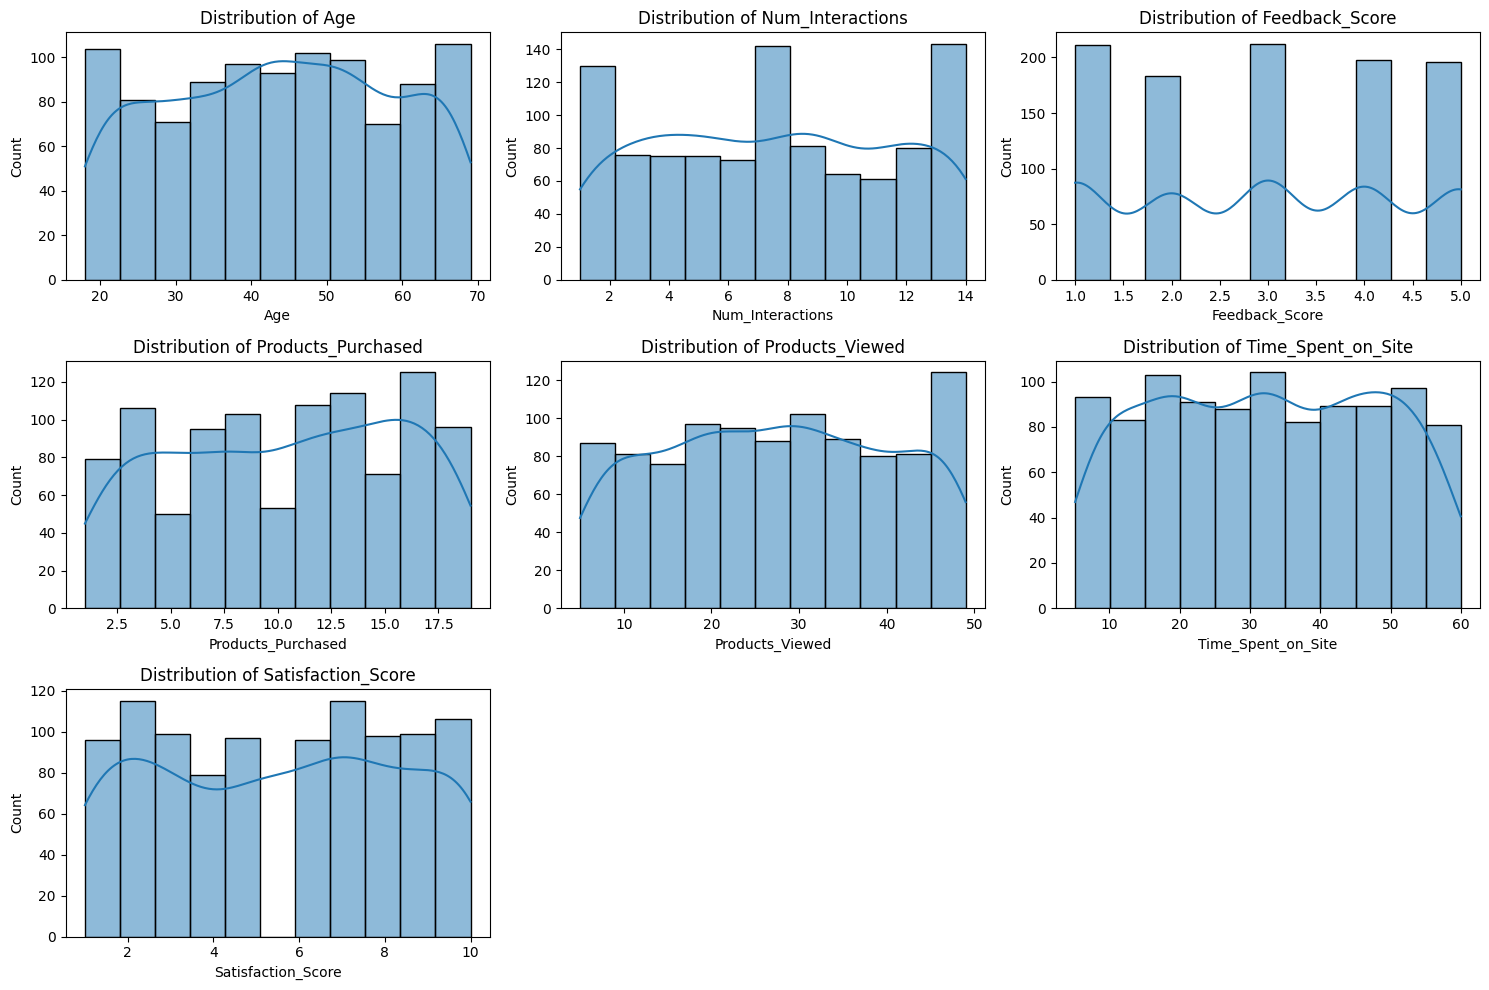

In [112]:
# Visualize distributions of numerical features
numerical_cols = ['Age', 'Num_Interactions', 'Feedback_Score', 'Products_Purchased', 
                  'Products_Viewed', 'Time_Spent_on_Site', 'Satisfaction_Score']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

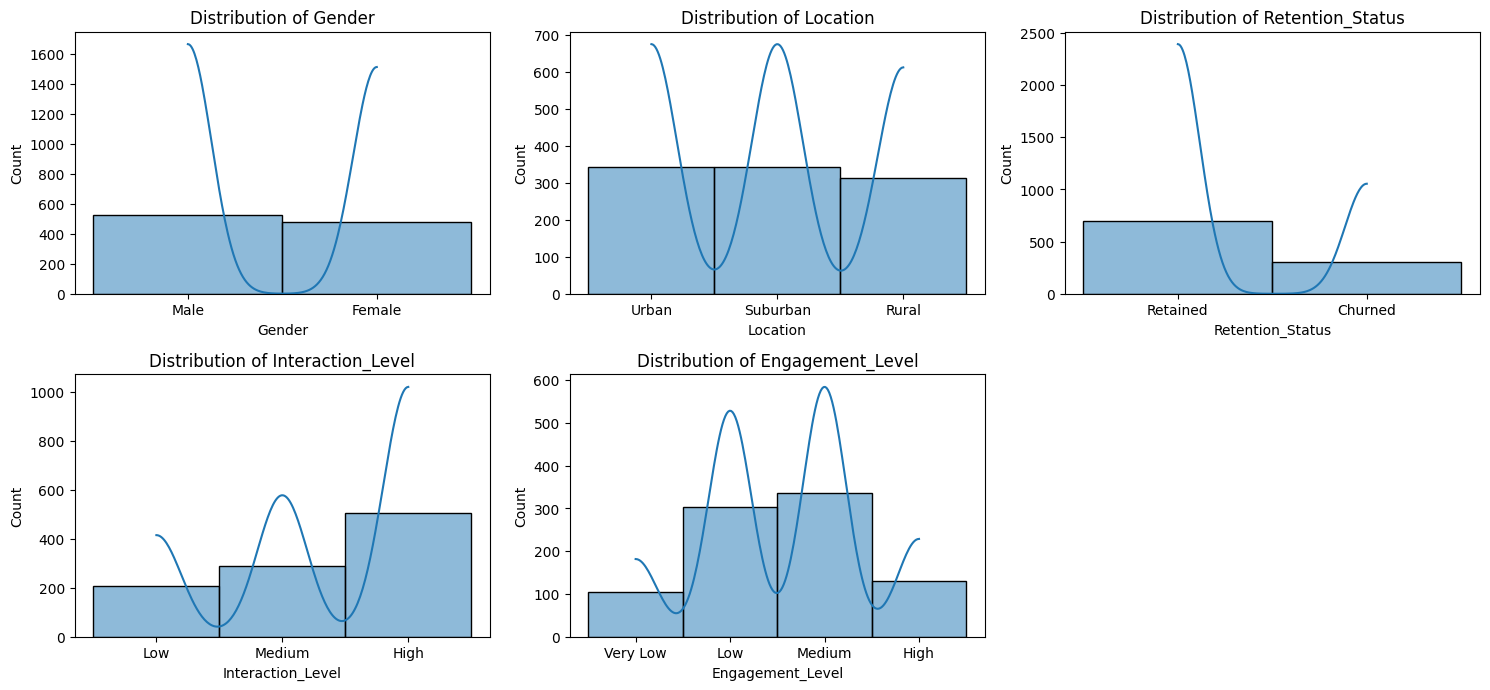

In [ ]:
# Visualize distributions of categorical features
categorical_cols = ['Gender', 'Location','Retention_Status',
       'Interaction_Level', 'Engagement_Level' 
]
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


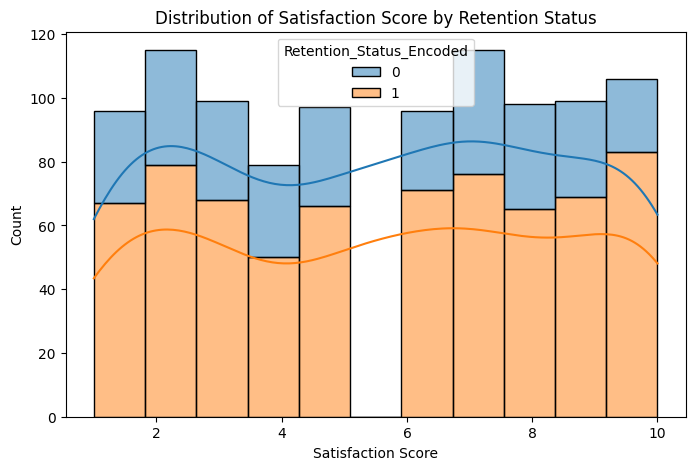

In [ ]:
# Visualize the distribution of Satisfaction Score by Retention Status / Retention Durumuna Göre Memnuniyet Skoru Dağılımı
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Satisfaction_Score', hue='Retention_Status_Encoded', kde=True, multiple='stack')
plt.title("Distribution of Satisfaction Score by Retention Status")
plt.xlabel("Satisfaction Score")
plt.ylabel("Count")
plt.show()

#Conclusion: 
#Yüksek memnuniyet skoruna sahip müşterilerde retention oranı daha yüksek; düşük skorlar churn olasılığını artırıyor. 

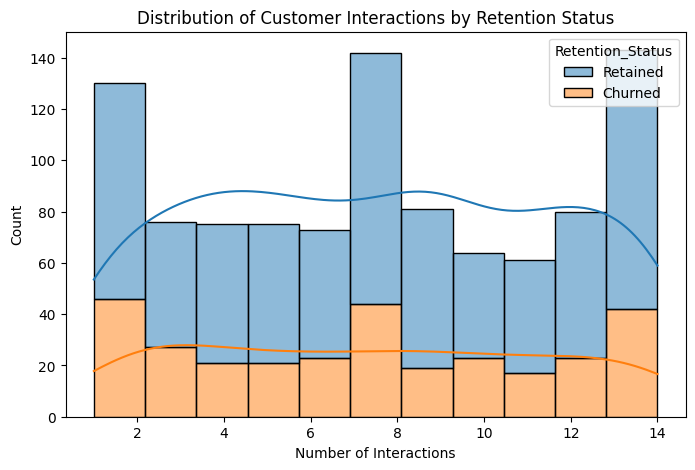

In [ ]:
# Visualize the distribution of 'Num_Interactions' by 'Retention_Status' / Retention Durumuna Göre Etkileşim Sayısı Dağılımı
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Num_Interactions', hue='Retention_Status', kde=True, multiple='stack')
plt.title("Distribution of Customer Interactions by Retention Status")
plt.xlabel("Number of Interactions")
plt.ylabel("Count")
plt.show()
#Conclusion:
#Daha fazla etkileşime giren müşterilerde retention oranı belirgin şekilde daha yüksek; churned müşteri sayısı düşük kalıyor.

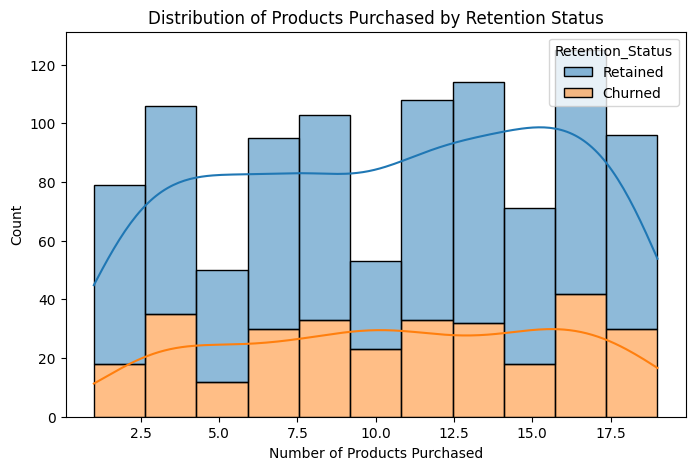

In [ ]:
# Visualize the distribution of Products Purchased by Retention Status / Retention Durumuna Göre Satın Alınan Ürün Sayısı Dağılımı
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Products_Purchased', hue='Retention_Status', kde=True, multiple='stack')
plt.title('Distribution of Products Purchased by Retention Status')
plt.xlabel('Number of Products Purchased')
plt.ylabel('Count')
plt.show()

#Conclusion:
#Daha fazla ürün satın alan müşterilerde retention oranı belirgin şekilde daha yüksektir; churned müşteri sayısı her aralıkta daha az kalıyor.

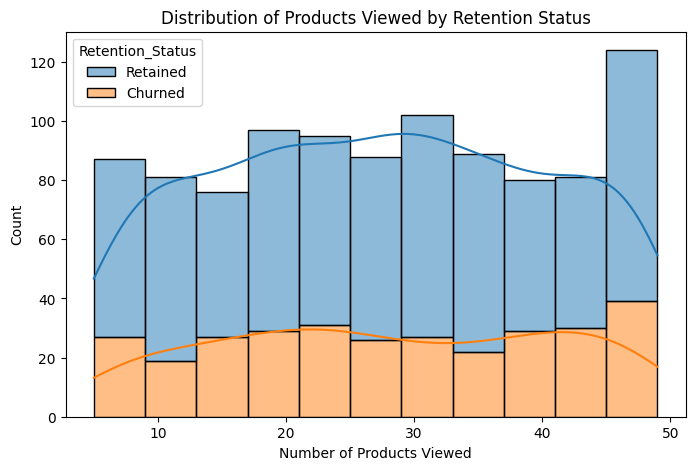

In [ ]:
# Visualize the distribution of Products Viewed by Retention Status / Retention Durumuna Göre Görüntülenen Ürün Sayısı Dağılımı
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Products_Viewed', hue='Retention_Status', kde=True, multiple='stack')
plt.title('Distribution of Products Viewed by Retention Status')
plt.xlabel('Number of Products Viewed')
plt.ylabel('Count')
plt.show()

#Conclusion:
#Daha fazla ürün görüntüleyen müşterilerde retention oranı belirgin şekilde daha yüksektir; churned müşteri sayısı tüm aralıklarda daha az kalıyor.

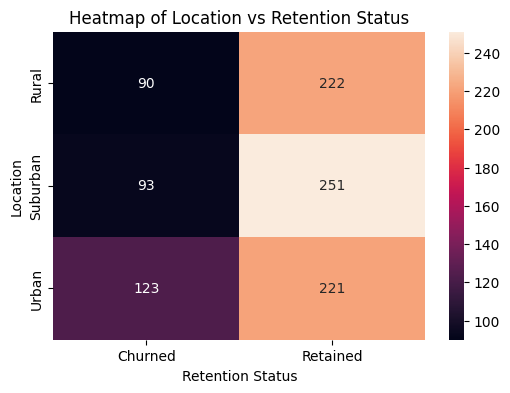

In [ ]:
# Heatmap of Location vs Retention Status / Lokasyon ve Retention Durumu Arasındaki Isı Haritası
contingency_table=pd.crosstab(df['Location'], df['Retention_Status'])

plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Heatmap of Location vs Retention Status')
plt.xlabel('Retention Status')
plt.ylabel('Location')
plt.show()

#Tüm bölgelerde retention oranı yüksek olsa da, kentsel bölgelerde müşteri kaybı diğer bölgelere göre daha fazla. 
# Banliyö ve kırsal bölgelerde müşteri sadakati daha güçlü görünüyor.

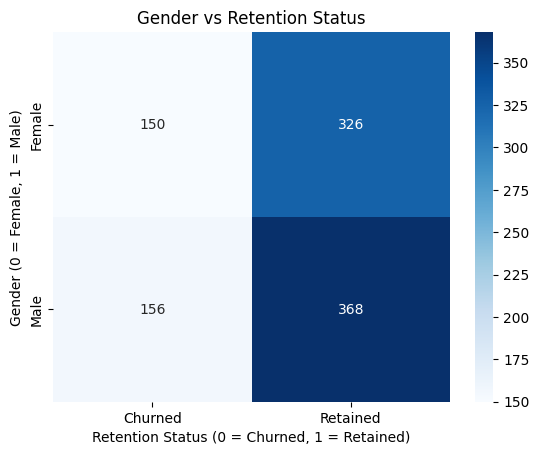

In [ ]:
# Cinsiyet ve Retention Durumu Arasındaki Isı Haritası  
contingency_table = pd.crosstab(df['Gender'], df['Retention_Status'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Gender vs Retention Status')
plt.xlabel('Retention Status (0 = Churned, 1 = Retained)')
plt.ylabel('Gender (0 = Female, 1 = Male)')
plt.show()

#Conclusion:
#Her iki cinsiyette de retention oranı yüksek; ancak erkek müşterilerde elde tutma oranı biraz daha fazla. 
# Kaybedilen müşteri sayıları ise kadın ve erkeklerde benzer düzeyde.

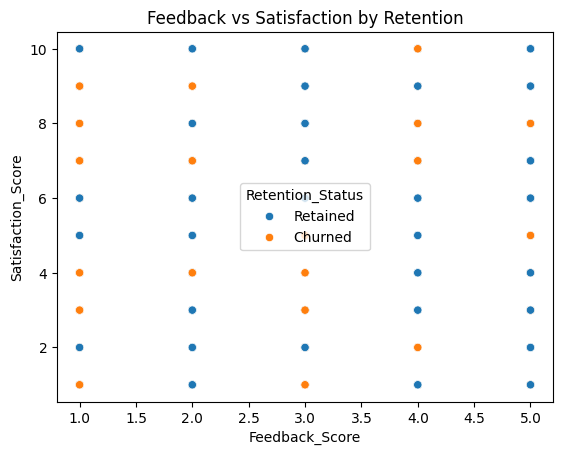

In [ ]:
# Feedback ve Memnuniyet ilişkisi
sns.scatterplot(x='Feedback_Score', y='Satisfaction_Score', hue='Retention_Status', data=df)
plt.title("Feedback vs Satisfaction by Retention")
plt.show()

#Feedback ve memnuniyet skorları, retention durumunu tek başına belirgin şekilde ayırt etmiyor; her iki statüde de puanlar dengeli dağılmış durumda.

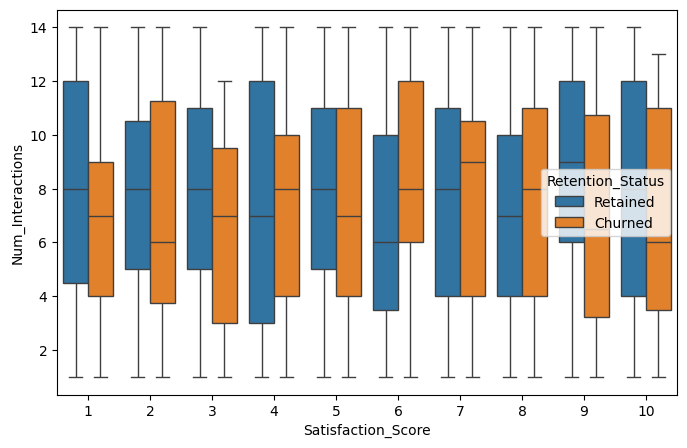

In [ ]:
# Visualize the relationship between Satisfaction Score and Number of Interactions / Memnuniyet Skoru ve Etkileşim Sayısı Arasındaki İlişkiyi Görselleştirme
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='Satisfaction_Score',y='Num_Interactions',hue='Retention_Status')
plt.show()

#Conclusion
#Memnuniyet seviyesi arttıkça, elde tutulan müşterilerde etkileşim sayısı anlamlı şekilde daha yüksek; bu da etkileşim sıklığının müşteri sadakatini güçlendirdiğini gösteriyor.

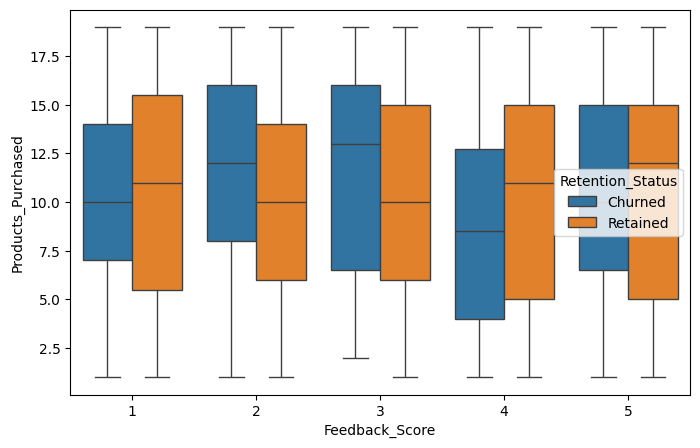

In [ ]:
# Visualize the relationship between Feedback Score and Products Purchased / Feedback Skoru ve Satın Alınan Ürün Sayısı Arasındaki İlişkiyi Görselleştirme
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='Feedback_Score',y='Products_Purchased',hue='Retention_Status')
plt.show()

#Conclusion:
#Feedback skorları arttıkça retained ve churned müşterilerin satın aldığı ürün sayısı benzer aralıklarda kalıyor; bu metrik, retention için tek başına ayırt edici değil.


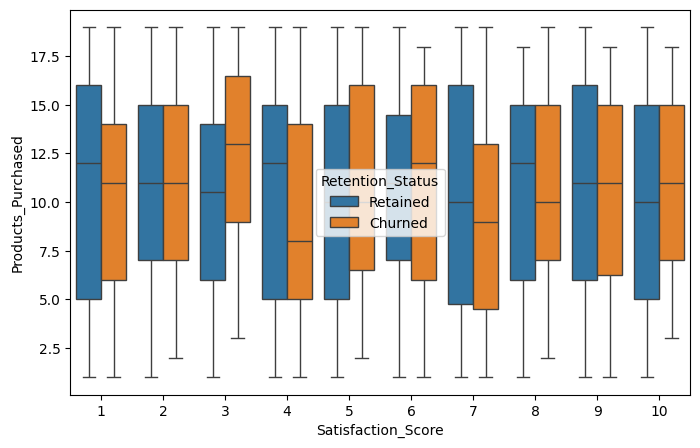

In [ ]:
# Visualize the relationship between Satisfaction Score and Number of Interactions / Memnuniyet Skoru ve Etkileşim Sayısı Arasındaki İlişkiyi Görselleştirme
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='Satisfaction_Score',y='Products_Purchased',hue='Retention_Status')
plt.show()

#Conclusion:
#Satın alınan ürün sayısı, müşteri memnuniyet seviyesine göre retention durumunda anlamlı bir fark göstermiyor; retained ve churned müşteriler benzer aralıklarda ürün satın alıyor.

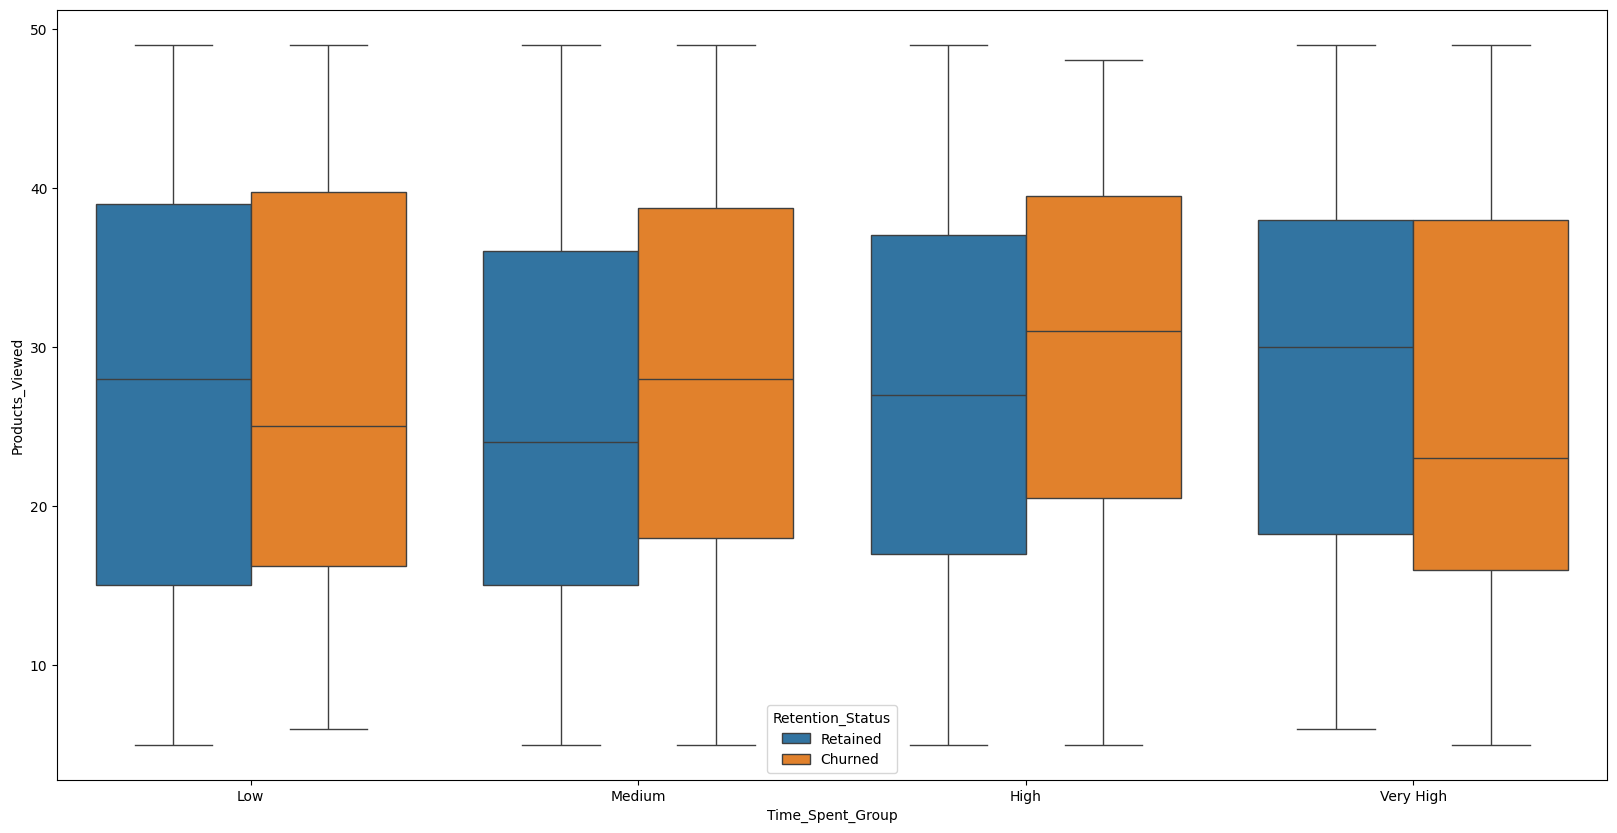

In [ ]:
# Visualize the relationship between Time Spent on Site and Products Viewed / Sitede Harcanan Süre ve Görüntülenen Ürün Sayısı Arasındaki İlişkiyi Görselleştirme
df['Time_Spent_Group'] = pd.cut(df['Time_Spent_on_Site'],
                                bins=4,
                                labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(20,10))
sns.boxplot(data=df,x="Time_Spent_Group",y='Products_Viewed',hue='Retention_Status')
plt.show()

#Conclusion:
#Sitede geçirilen süre arttıkça retained müşteriler genellikle daha fazla ürün görüntülüyor, bu da etkileşimin sadaketi artırdığını gösteriyor; fakat en yüksek grupta fark azalıyor.

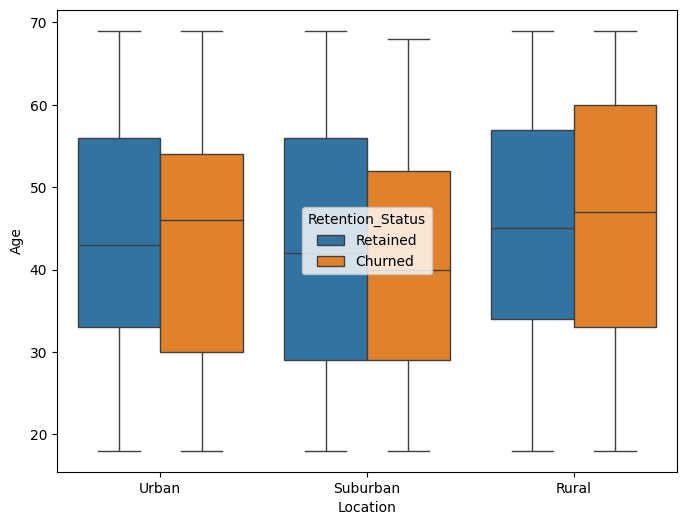

In [ ]:
# Visualize the relationship between Age and Retention Status by Location / Yaş ve Retention Durumu Arasındaki İlişkiyi Lokasyona Göre Görselleştirme

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Location',y='Age',hue="Retention_Status")
plt.show()

#Conclusion:
#Her üç lokasyon türünde de genç müşterilerde retention oranı daha yüksek; yaş ilerledikçe churn olasılığı artıyor. Özellikle kırsal bölgede bu fark daha belirgin.